# Eniac Analysis

## Import Libraries

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import seaborn as sns
import pandas as pd
import numpy as np
import customplots
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

plt.style.use("default")

pd.options.display.max_columns = None # Print all columns to console
pd.set_option('display.max_colwidth', None) # Don't cut off columns (=max width per column)

## Import Data

In [5]:
folder = 'C:/Users/Patrick/OneDrive/Data Science/WBS Coding School/Bootcamp/02_Bootcamp/03_Week-03_Data-Cleaning&Storytelling/Python/cleaned_data/'
"""
-----List of CSVs:-----
brands.csv
orderlines.csv
orders.csv
products.csv
"""

brands = pd.read_csv(folder + 'brands.csv')
orderlines = pd.read_csv(folder + 'orderlines_cleaned_Completed.csv')
orders = pd.read_csv(folder + 'orders_cleaned_Completed.csv')
products = pd.read_csv(folder + 'products_cleaned_Completed.csv')
type_to_keywords = pd.read_csv(folder + 'type_to_keywords.csv')
type_to_keywords_m = pd.read_csv(folder + 'type_to_keywords_manual.csv')

orders['created_date'] = pd.to_datetime(orders['created_date'])

In [6]:
# --- FUNCTION FOR COLOR GRADIENTS IN PLOTS
def mycol(df):
    # Get min/max values of price ratio
    rmin = df.min()
    rmax = df.max()
    ravg = df.mean()

    # Call colormap for plot
    my_cmap = plt.get_cmap("magma")
    # Remap values
    rescale = lambda y: (df - rmin)/(rmax-rmin)
    return my_cmap(rescale(df))

# Product Types

The product table contains 126 unique product types.

## Type List

In [9]:
type_to_keywords_m

,type_var,desc_m
0,0,Support and Docking Stations
1,1,Keypads / Keyboards
2,2,PC mouses
3,3,Charging and docking
4,4,RAM
5,5,Cables
6,6,Headsets/Headphones
7,9,MacBook Pro Shock Protector
8,11,Smartphone covers
9,12,Apple connectors (only 3 products)


## Show products of one type

In [11]:
products[products['type_var']==94]

# products[products['type']=='1298']

# products['type_var'].nunique()

,sku,name,desc,unit_price,in_stock,type,type_var
2457,APP1634,Apple iPhone 7 Plus 128GB Black Bright,New Apple iPhone 7 Plus 128GB Black Free Bright,889.00,0,85651716,94
2458,APP1640,Apple iPhone 7 Plus 32GB Black,New 32GB Apple iPhone 7 Plus Free Black,779.00,0,85651716,94
2459,APP1630,Apple iPhone 7 Plus 128GB Black,New Apple iPhone 7 Plus Free Black 128GB,889.00,1,85651716,94
2460,APP1641,Apple iPhone 7 Plus 32GB Silver,New Apple iPhone 32GB 7 plus free Plata,779.00,0,85651716,94
2461,APP1631,Apple iPhone 7 Plus 128GB Silver,New Apple iPhone 7 Plus 128GB free Plata,889.00,0,85651716,94
2462,APP1642,Apple iPhone 7 Plus 32GB Gold,New Apple iPhone 32GB 7 plus free gold,779.00,0,85651716,94
2463,APP1632,Apple iPhone 7 Plus 128GB Gold,New Apple iPhone 7 Plus 128GB Free Gold,889.00,0,85651716,94
2464,APP1643,Apple iPhone 7 Plus 32GB Rose Gold,New Apple iPhone 32GB Rose Gold Plus 7 Free,779.00,0,85651716,94
2465,APP1633,Apple iPhone 7 Plus 128GB Rose Gold,New Apple iPhone 7 Plus 128GB Rose Gold free,889.00,0,85651716,94
3366,APP1988,Apple iPhone 7 Plus (PRODUCT) Red 128GB,New iPhone 7 plus special edition red free 128GB,889.00,0,85651716,94


# Data-prep

In [13]:
#--- SELECT THE TYPE INTERVAL YOU WANT TO INSPECT AND THE TIME PERIOD (next cell)
# Types: 0-125
type0 = 0
type1 = 110
# typeselect = list(range(type0,type1)) # Doesn't work yet!->Needs iLoc addressing of pivot table
typeselect = sorted([23,24,20,31,11,4,36,76,91,98,97,12,6,17,41])
period = 'W'


In [14]:
#--- PREPARE SOME STUFF
# Get the orderlines and merge the product type to each orderline
OL_type = (
    orderlines
    .merge(products,how='left',on='sku')
    .drop(columns=['name_x','desc_x','name_y','name_y','desc_y','product_price','in_stock'])
    # [['created_date','sku','type_var','unit_price_x','unit_price_y']]
    .rename(columns={'unit_price_x':'order_price','unit_price_y':'product_price'})
)

# Get brand name
OL_type['short'] = OL_type['sku'].str[:3]
OL_type = OL_type.assign(brand=OL_type.merge(brands, how='left', on='short')['long'])
OL_type.drop('short',axis=1)

# Get a price ratio by dividing order price by product price
OL_type['price_rat'] = 1 - OL_type['order_price']/OL_type['product_price']
# Convert the date-column to datetime
OL_type['created_date'] = pd.to_datetime(OL_type['created_date'])

# Discounts per product type

### Discounts per type over time

The following heatmap displays the average price ratio of different product types over time.
Price ratio is defined as the order price divided by product price.
Values are averaged per time-period and aggregated by product type.

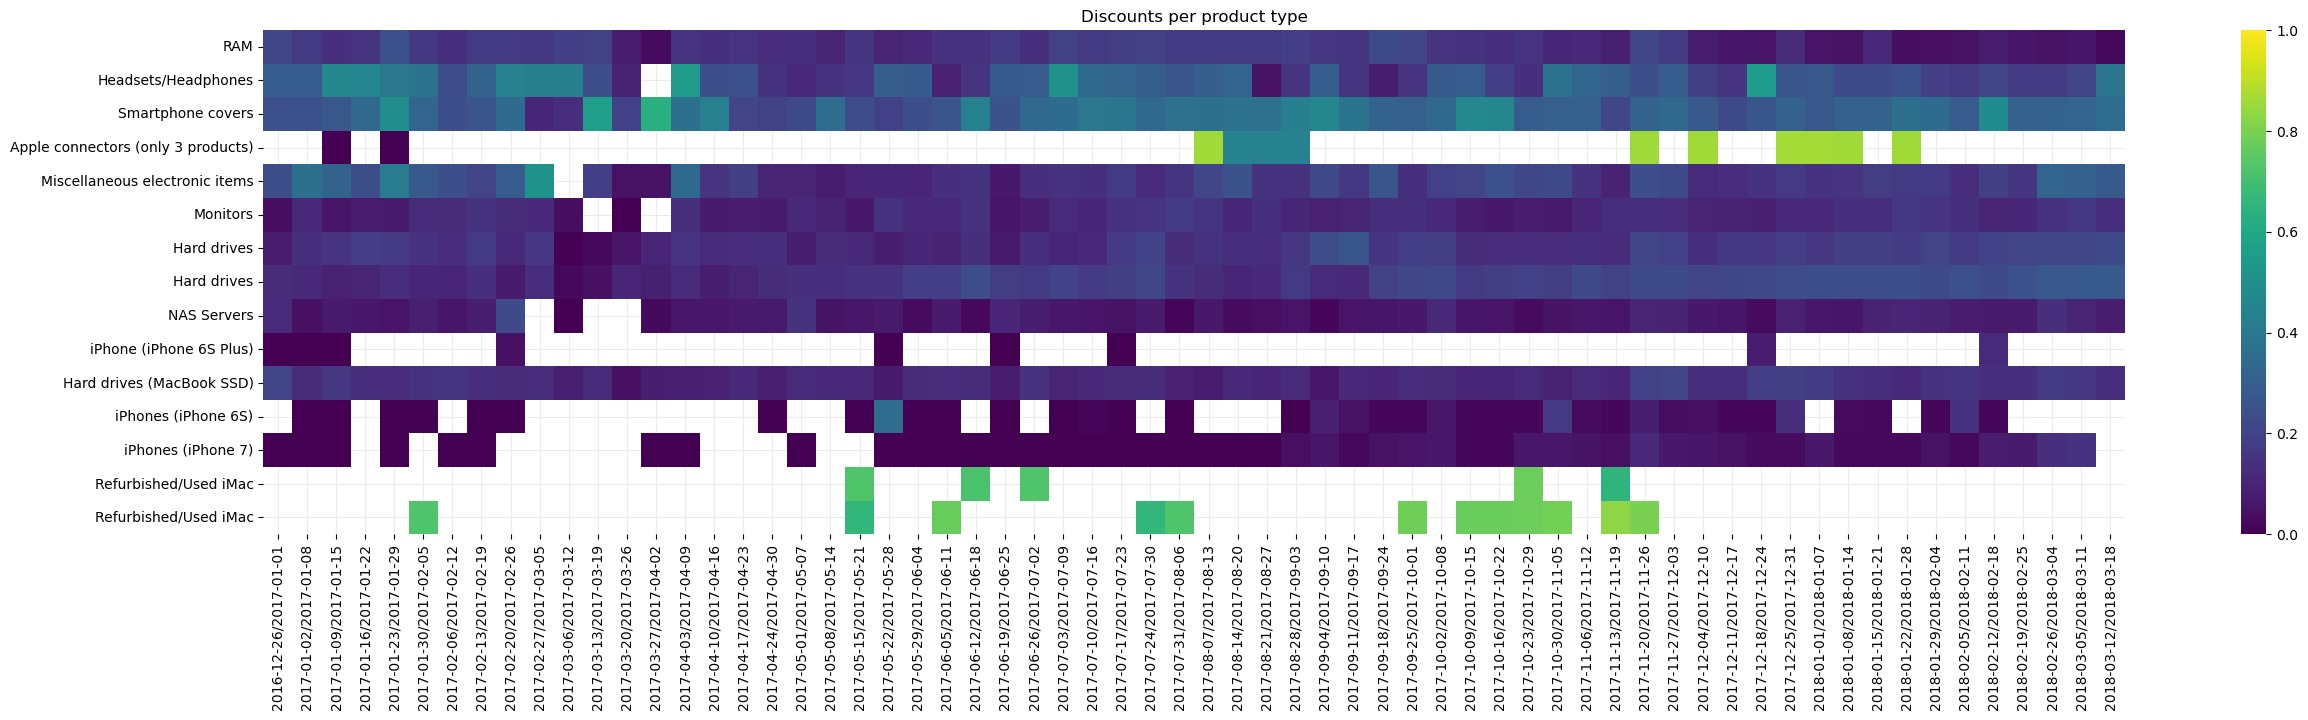

In [17]:
#--- AGGREGATE SOME STUFF
agg_cat = 'price_rat'
agg_method = 'mean'

# Aggregate data by time-period and average the price ratio
OL_type_agg = OL_type.groupby([OL_type['created_date'].dt.to_period(period),'type_var']).agg({agg_cat:agg_method}).reset_index()

# Add keyword-description
# OL_type_agg = OL_type_agg.merge(type_to_keywords_m,on='type_var',how='left')

# ?? Convert dates to singular date-value ??
# OL_type_agg['created_date'] = OL_type_agg['created_date'].astype(str).str[:10] + ' 00:00:00'
# OL_type_agg['created_date'] = pd.to_datetime(OL_type_agg['created_date'])

# Pivot the dataframe for plotting
OL_type_pivot = OL_type_agg.pivot(index='type_var',columns='created_date',values=agg_cat)

# Userselection of types
OL_type_pivot = OL_type_pivot.loc[typeselect,:]

OL_yticks = OL_type_pivot.merge(type_to_keywords_m,on='type_var',how='left')['desc_m']

#--- PLOT SOME STUFF
fig, ax = plt.subplots(figsize=(24,0.5*len(typeselect)))

ax = sns.heatmap(
    OL_type_pivot,
    vmin=0,
    vmax=1,
    cmap='viridis'
    );

ax.set_title('Discounts per product type')
plt.xticks(rotation=90)
plt.tight_layout()
plt.grid(color=[0.92,0.92,0.92])
ax.set_axisbelow(True) # Plot grid etc. behind plot elements
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels(OL_yticks,rotation=0);

# ?? Only plot monthly x-ticks ??
# plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
# plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B'))

# ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

# plt.gcf().autofmt_xdate()


### Discounts overall over time (all time)

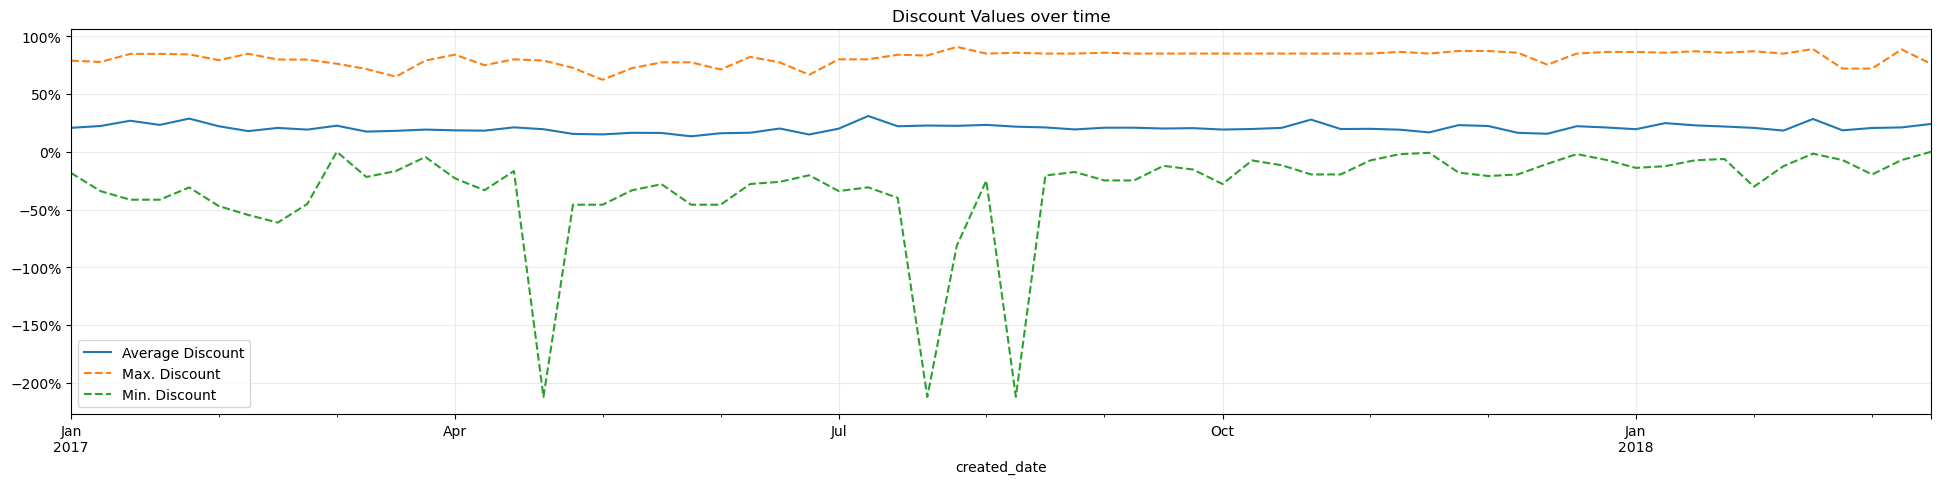

In [19]:
df_plot = OL_type.groupby(OL_type['created_date'].dt.to_period(period)).agg({'price_rat':['mean','max','min']})*100

ax = df_plot.plot(figsize=(24,5))

ax.lines[1].set_linestyle('--')
ax.lines[2].set_linestyle('--')

# Format yaxis to display percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_title('Discount Values over time')

ax.legend(['Average Discount','Max. Discount','Min. Discount'])

plt.grid(color=[0.92,0.92,0.92])
ax.set_axisbelow(True) # Plot grid etc. behind plot elements

### Discounts overall over time (recently)

(-100.0, 100.0)

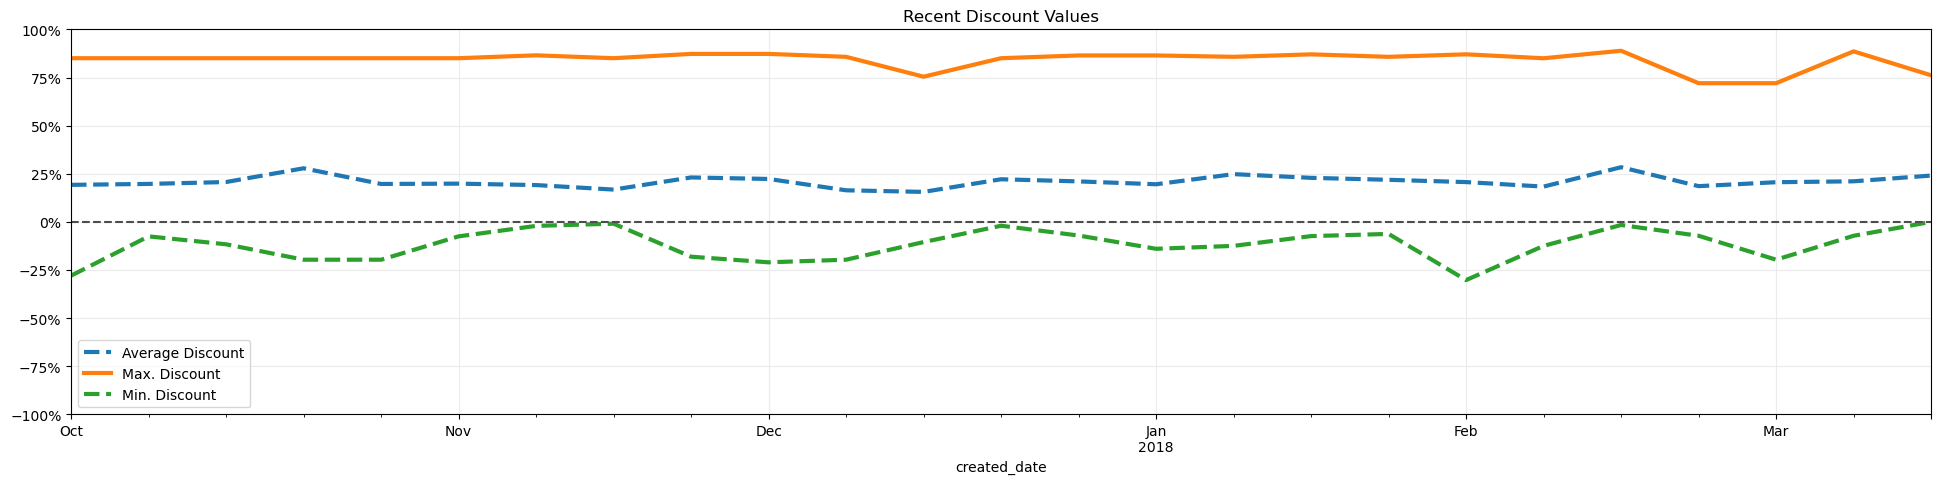

In [21]:
df_plot = OL_type.groupby(OL_type['created_date'].dt.to_period(period)).agg({'price_rat':['mean','max','min']})*100

start_date = '2017-10-01'
end_date = '2018-04-01'
selected_period = df_plot.loc[start_date:end_date]

ax = selected_period.plot(figsize=(24,5),linewidth=3)

ax.lines[0].set_linestyle('--')
ax.lines[2].set_linestyle('--')

# Add horizonal line to indicate middle
ax.axhline(y=0, color=np.ones(3)*0.3, linestyle='--', linewidth=1.5)  

# Format yaxis to display percentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_title('Recent Discount Values')

ax.legend(['Average Discount','Max. Discount','Min. Discount'])

plt.grid(color=[0.92,0.92,0.92])
ax.set_axisbelow(True) # Plot grid etc. behind plot elements
ax.set_ylim([-100,100])

### Average discounts overall

Average discount: 23.9 %




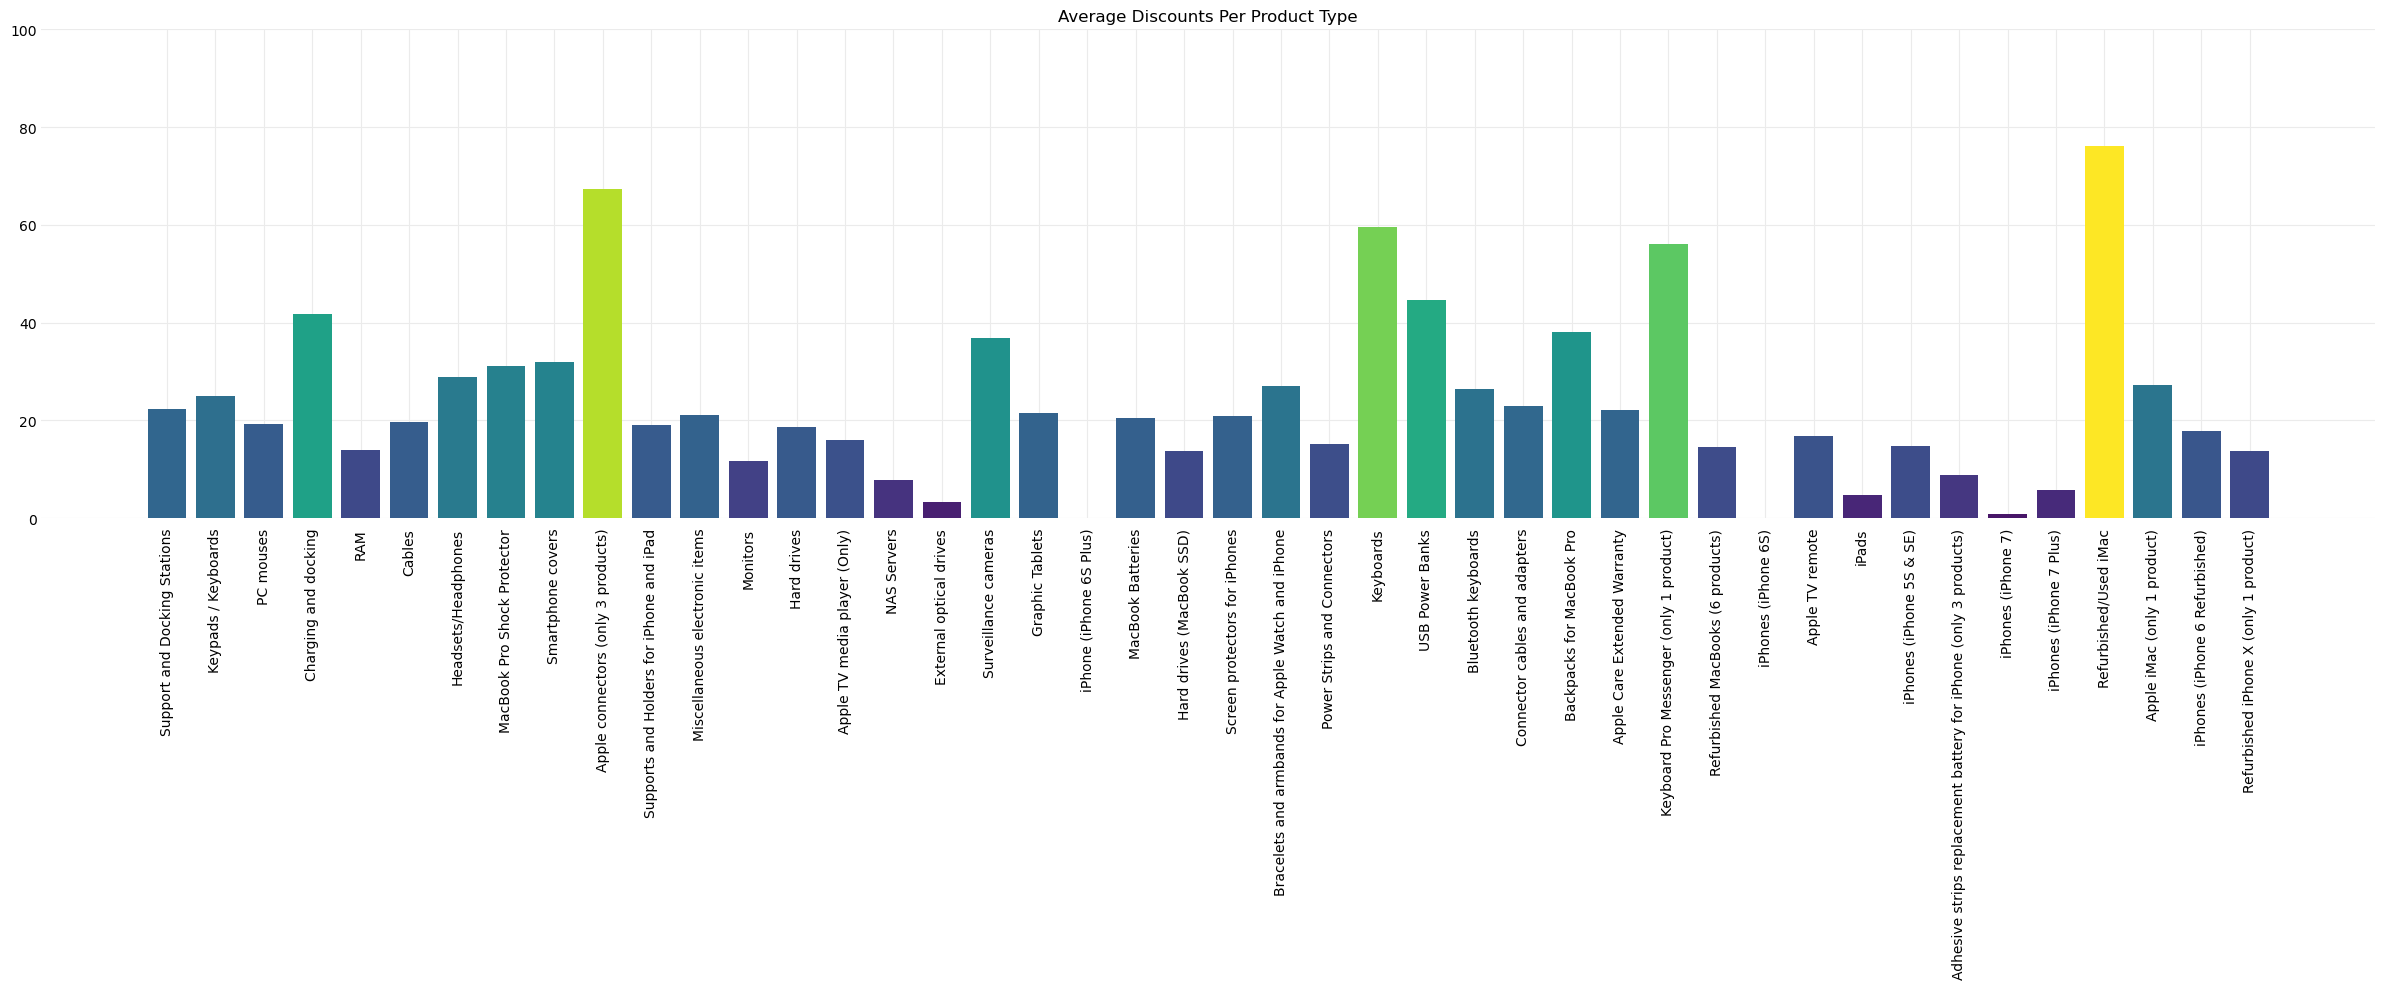

In [23]:
agg_cat = 'price_rat'
agg_method = 'mean'
# Aggregate average discount ratios per type
type_avg = OL_type.groupby('type_var').agg({agg_cat:agg_method}).reset_index()
type_avg = type_avg.merge(type_to_keywords_m, how='left', on='type_var')

type_avg = type_avg[~type_avg['desc_m'].isna()]

# Get min/max values of price ratio
rmin = type_avg[agg_cat].min()
rmax = type_avg[agg_cat].max()
ravg = type_avg[agg_cat].mean()

print(f'Average discount: {round(100*ravg,1)} %')
print('\n')

# Call colormap for plot
my_cmap = plt.get_cmap("viridis")
# Remap values
rescale = lambda y: (type_avg[agg_cat] - rmin)/(rmax-rmin)

# --- PLOT SOME STUFF
fig, ax = plt.subplots(figsize=(24,10))
ax.bar(type_avg['desc_m'],
       100*type_avg[agg_cat],
       color=my_cmap(rescale(type_avg)))

# # Set xticks as linscape between min and max type
# ax.set_xticks(np.linspace(type_avg['type_var'].min(),type_avg['type_var'].max(), int(type_avg['type_var'].max()/2) + 1))

# # Elongate average-line to left and right
# off_avg = 2
# ravg *= 100
# ax.plot([0-off_avg, off_avg + products['type_var'].max()],[ravg, ravg],'k--')
plt.title('Average Discounts Per Product Type')

ax.set_ylim([0,100]);

plt.xticks(rotation=90);

# # Format yaxis to display percentage
# ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.tight_layout()
plt.grid(color=[0.92,0.92,0.92])
ax.set_axisbelow(True) # Plot grid etc. behind plot elements

customplots.declutter(ax);

# Quantities per product type

### Quantities per type over time

The following heatmap displays the total quantities of different product types sold over time.
Quantity is defined as the sum of products sold per order.
Values are summed up per time-period and aggregated by product type.

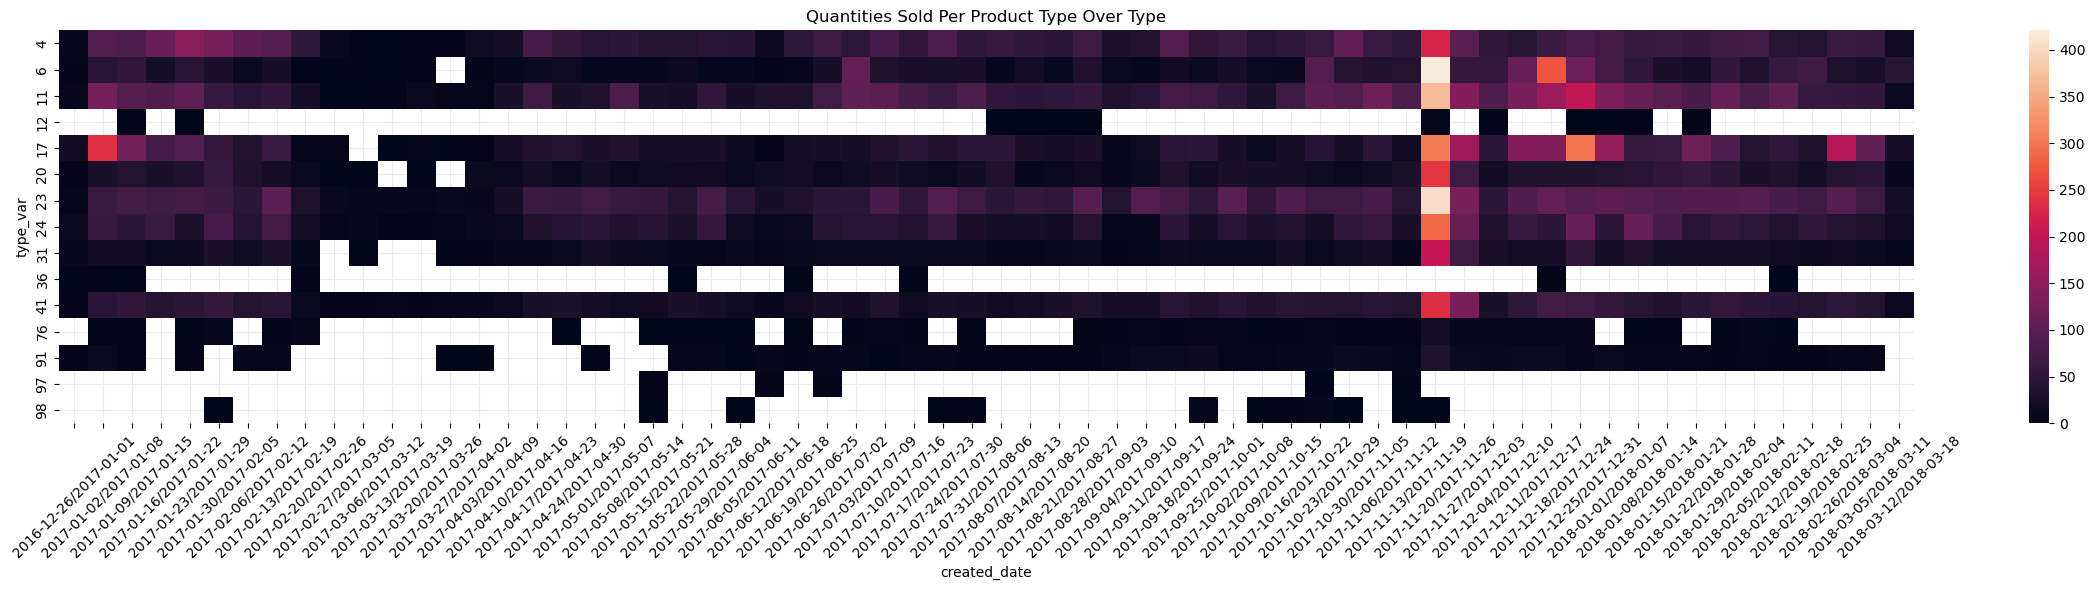

In [26]:
#--- AGGREGATE SOME STUFF
agg_cat = 'product_quantity'
agg_method = 'sum'

# Aggregate data by time-period and average the price ratio
OL_type_agg = OL_type.groupby([OL_type['created_date'].dt.to_period(period),'type_var']).agg({agg_cat:agg_method}).reset_index()

# Pivot the dataframe for plotting
OL_type_pivot = OL_type_agg.pivot(index='type_var',columns='created_date',values=agg_cat)
# Userselection of types
OL_type_pivot = OL_type_pivot.loc[typeselect,:]

#--- PLOT SOME STUFF
fig, ax = plt.subplots(figsize=(24,0.4*len(typeselect)))

ax = sns.heatmap(OL_type_pivot, vmin=0, vmax=OL_type_agg.max()[agg_cat])

ax.set_title('Quantities Sold Per Product Type Over Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(color=[0.92,0.92,0.92])
ax.set_axisbelow(True) # Plot grid etc. behind plot elements


### Normalized Quantities per type over time

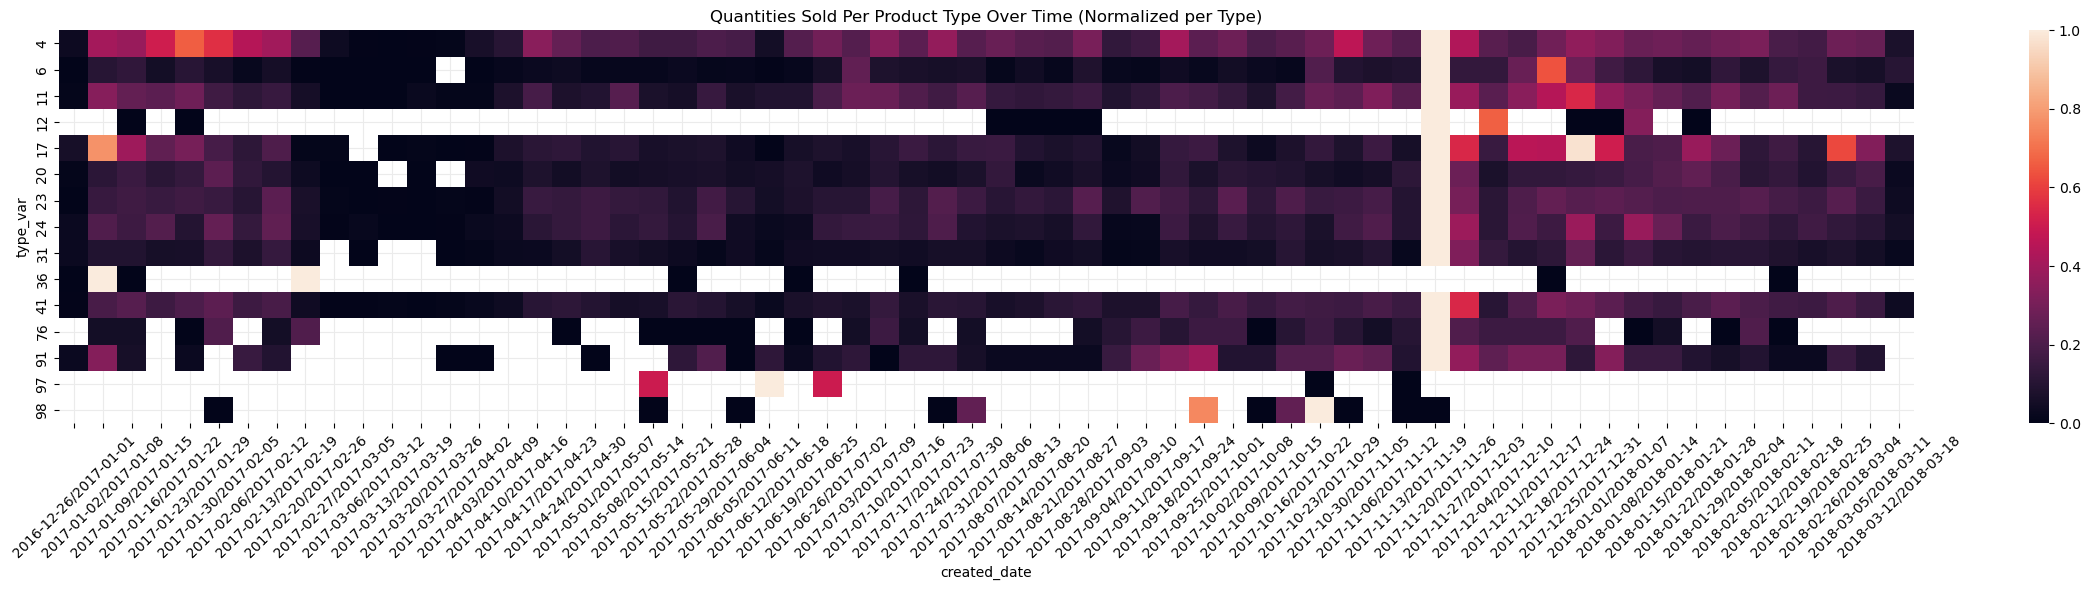

In [28]:
#--- AGGREGATE SOME STUFF
agg_cat = 'product_quantity'
agg_method = 'sum'

# Aggregate data by time-period and average the price ratio
OL_type_agg = OL_type.groupby([OL_type['created_date'].dt.to_period(period),'type_var']).agg({agg_cat:agg_method}).reset_index()

# Pivot the dataframe for plotting
OL_type_pivot = OL_type_agg.pivot(index='type_var',columns='created_date',values=agg_cat)
# Userselection of types
OL_type_pivot = OL_type_pivot.loc[typeselect,:]

# Get min/max values per type
df_min = OL_type_pivot.transpose().min().reset_index(drop=True)
df_max = OL_type_pivot.transpose().max().reset_index(drop=True)

# Normalize table-entries
for i in range(0,OL_type_pivot.shape[0]):
    OL_type_pivot.iloc[i,:] = (OL_type_pivot.iloc[i,:] - df_min[i])/(df_max[i] - df_min[i])
    pass

#--- PLOT SOME STUFF
fig, ax = plt.subplots(figsize=(24,0.4*len(typeselect)))

ax = sns.heatmap(OL_type_pivot, vmin=0, vmax=1)

ax.set_title('Quantities Sold Per Product Type Over Time (Normalized per Type)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(color=[0.92,0.92,0.92])
ax.set_axisbelow(True) # Plot grid etc. behind plot elements


### Total quantities overall

517.7894736842105


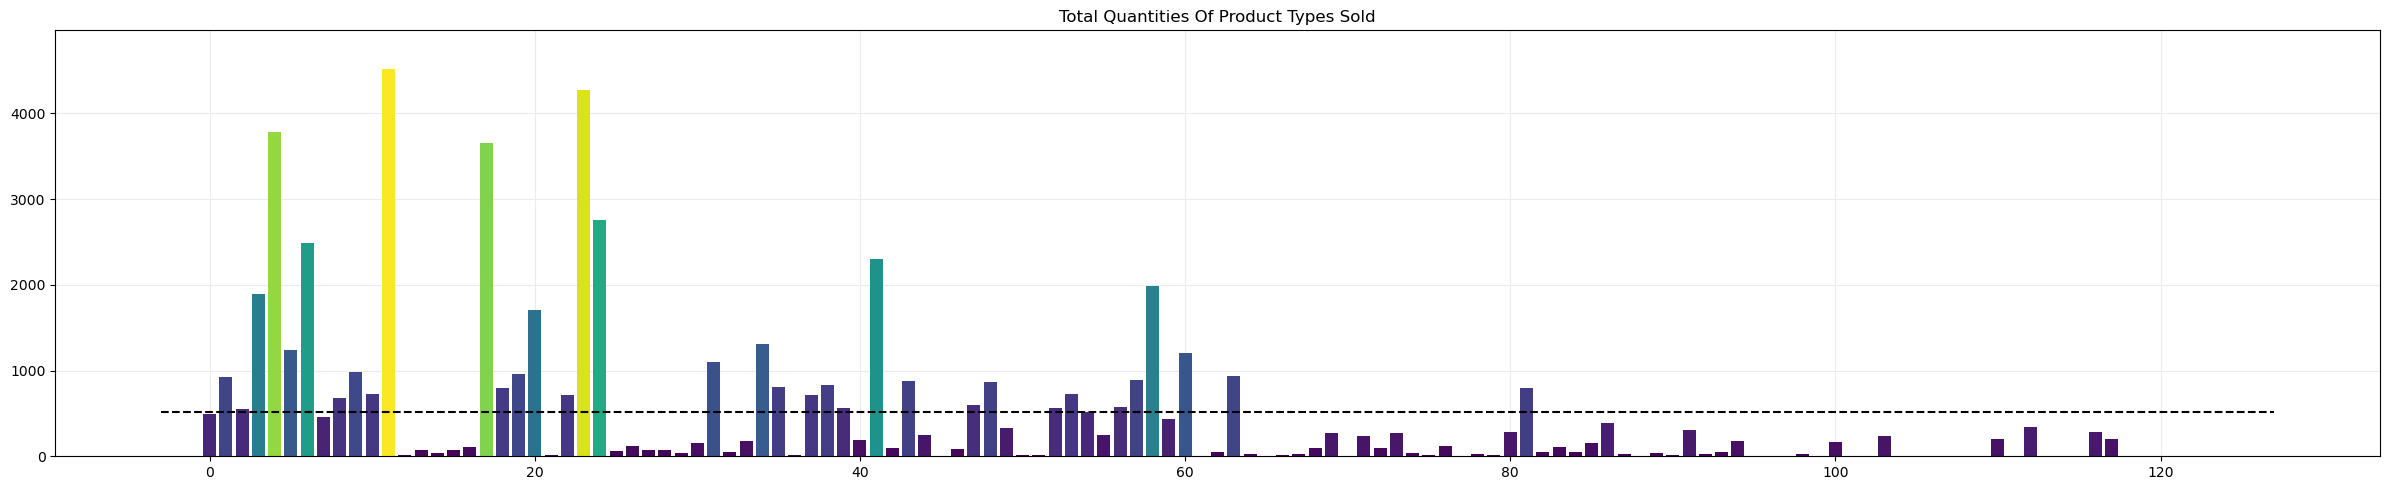

In [30]:
agg_cat = 'product_quantity'
agg_method = 'sum'
# Aggregate agg_cat per type
type_avg = OL_type.groupby('type_var').agg({agg_cat:agg_method}).reset_index()

# Get min/max values of agg_cat
rmin = type_avg[agg_cat].min()
rmax = type_avg[agg_cat].max()
ravg = type_avg[agg_cat].mean()
print(ravg)

# Call colormap for plot
my_cmap = plt.get_cmap("viridis")
# Remap values
rescale = lambda y: (type_avg[agg_cat] - rmin)/(rmax-rmin)

# --- PLOT SOME STUFF
fig, ax = plt.subplots(figsize=(24,5))
ax.bar(type_avg['type_var'], type_avg[agg_cat], color=my_cmap(rescale(type_avg)))

off_avg = 3
ax.plot([0-off_avg, off_avg + products['type_var'].max()],[ravg, ravg],'k--')
plt.title('Total Quantities Of Product Types Sold')

ax.set_ylim([0, 1.1*rmax])

plt.tight_layout()
plt.grid(color=[0.92,0.92,0.92])
ax.set_axisbelow(True) # Plot grid etc. behind plot elements

# Revenues per product type

### Revenues per type per week

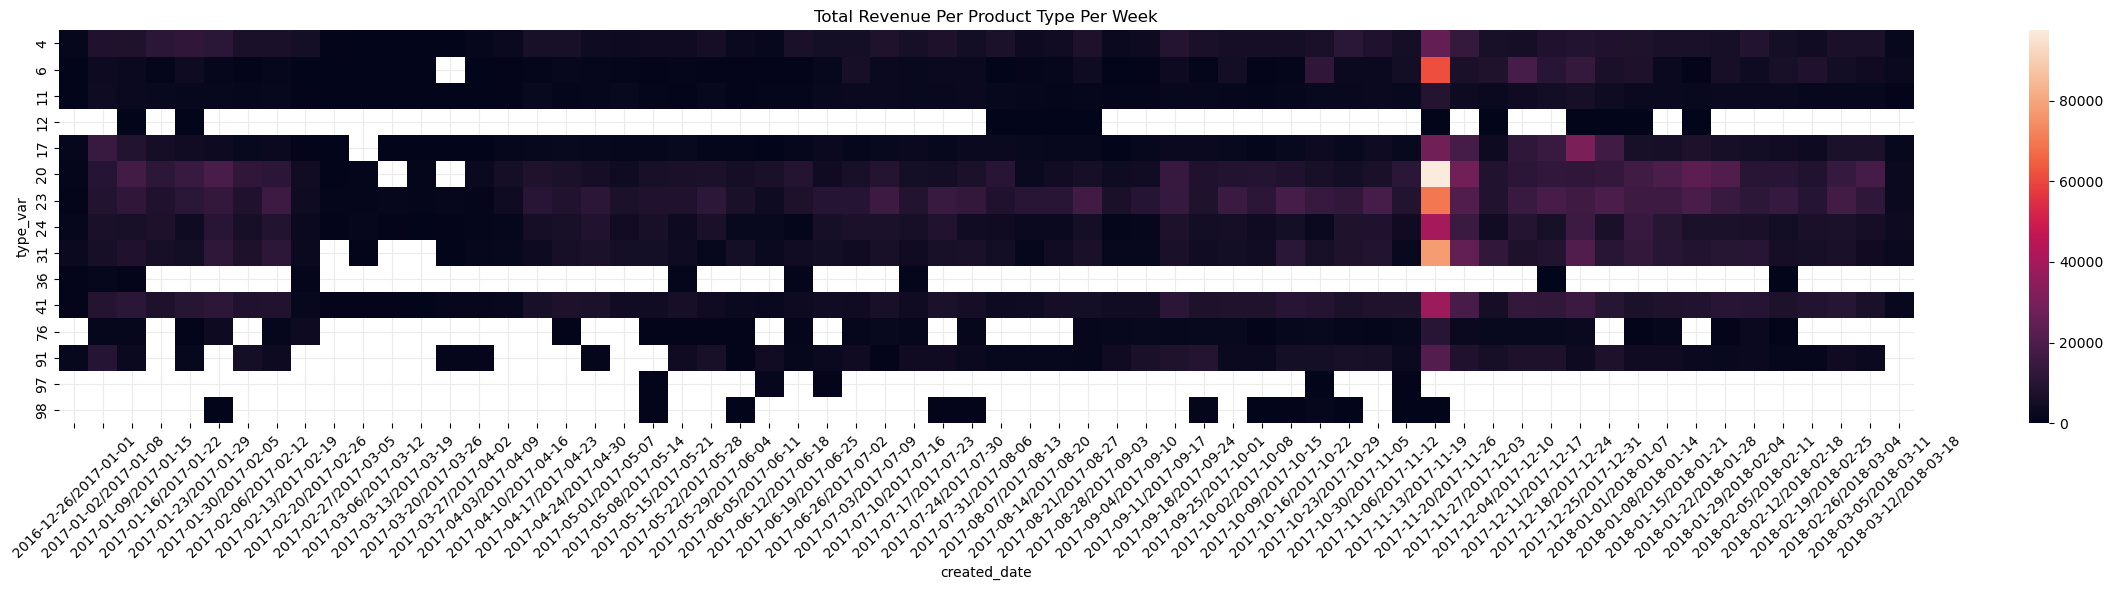

In [33]:
#--- AGGREGATE SOME STUFF
agg_cat = 'unit_price_total'
agg_method = 'sum'

# Aggregate data by time-period and average the price ratio
OL_type_agg = OL_type.groupby([OL_type['created_date'].dt.to_period(period),'type_var']).agg({agg_cat:agg_method}).reset_index()

# Pivot the dataframe for plotting
OL_type_pivot = OL_type_agg.pivot(index='type_var',columns='created_date',values=agg_cat)
# Userselection of types
OL_type_pivot = OL_type_pivot.loc[typeselect,:]

#--- PLOT SOME STUFF
fig, ax = plt.subplots(figsize=(24,0.4*len(typeselect)))

ax = sns.heatmap(OL_type_pivot, vmin=0, vmax=OL_type_agg.max()[agg_cat])

ax.set_title('Total Revenue Per Product Type Per Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(color=[0.92,0.92,0.92])
ax.set_axisbelow(True) # Plot grid etc. behind plot elements


### Normalized Revenues per type per week

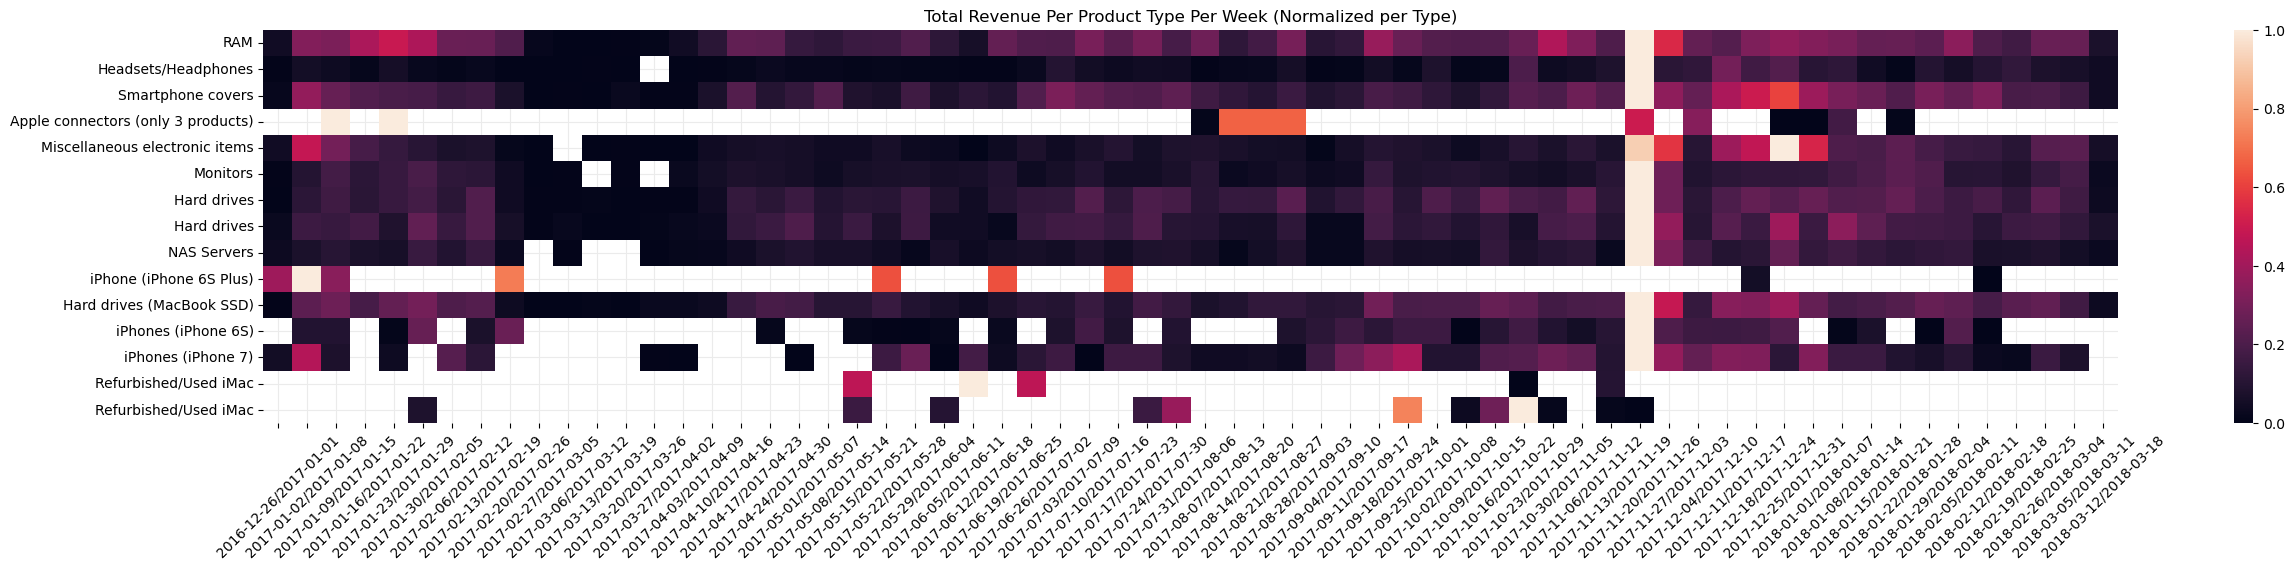

In [35]:
#--- AGGREGATE SOME STUFF
agg_cat = 'unit_price_total'
agg_method = 'sum'

# Aggregate data by time-period and average the price ratio
OL_type_agg = OL_type.groupby([OL_type['created_date'].dt.to_period(period),'type_var']).agg({agg_cat:agg_method}).reset_index()

# Pivot the dataframe for plotting
OL_type_pivot = OL_type_agg.pivot(index='type_var',columns='created_date',values=agg_cat)
# Userselection of types
OL_type_pivot = OL_type_pivot.loc[typeselect,:]

# Get min/max values per type
df_min = OL_type_pivot.transpose().min().reset_index(drop=True)
df_max = OL_type_pivot.transpose().max().reset_index(drop=True)

# Normalize table-entries
for i in range(0,OL_type_pivot.shape[0]):
    OL_type_pivot.iloc[i,:] = (OL_type_pivot.iloc[i,:] - df_min[i])/(df_max[i] - df_min[i])
    pass

OL_yticks = OL_type_pivot.merge(type_to_keywords_m,on='type_var',how='left')['desc_m']

#--- PLOT SOME STUFF
fig, ax = plt.subplots(figsize=(24,0.4*len(typeselect)))

ax = sns.heatmap(OL_type_pivot, vmin=0, vmax=1)

ax.set_title('Total Revenue Per Product Type Per Week (Normalized per Type)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(color=[0.92,0.92,0.92])
ax.set_axisbelow(True) # Plot grid etc. behind plot elements
ax.set_yticklabels(OL_yticks,rotation=0);
ax.set_xlabel('');
ax.set_ylabel('');


### Total revenues overall

Average revenue: 67746 €


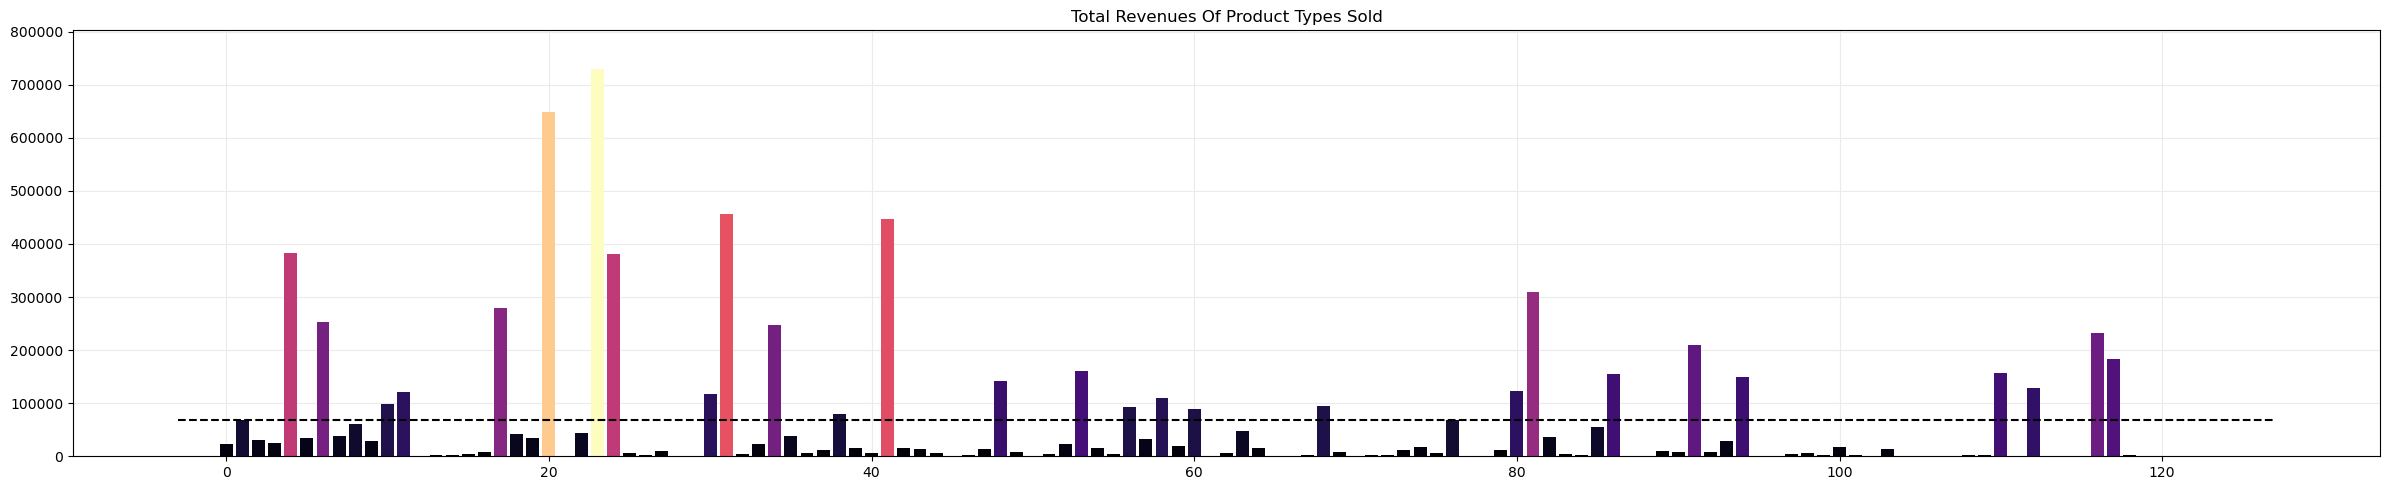

In [37]:
agg_cat = 'unit_price_total'
agg_method = 'sum'
# Aggregate agg_cat per type
type_avg = OL_type.groupby('type_var').agg({agg_cat:agg_method}).reset_index()

# Get min/max values of agg_cat
rmin = type_avg[agg_cat].min()
rmax = type_avg[agg_cat].max()
ravg = type_avg[agg_cat].mean()

print(f'Average revenue: {round(ravg)} €')

# Call colormap for plot
my_cmap = plt.get_cmap("magma")
# Remap values
rescale = lambda y: (type_avg[agg_cat] - rmin)/(rmax-rmin)

# --- PLOT SOME STUFF
fig, ax = plt.subplots(figsize=(24,5))
ax.bar(type_avg['type_var'], type_avg[agg_cat], color=my_cmap(rescale(type_avg)))

off_avg = 3
ax.plot([0-off_avg, off_avg + products['type_var'].max()],[ravg, ravg],'k--')
plt.title('Total Revenues Of Product Types Sold')

ax.set_ylim([0, 1.1*rmax])

plt.tight_layout()
plt.grid(color=[0.92,0.92,0.92])
ax.set_axisbelow(True) # Plot grid etc. behind plot elements

# A look at orders

## Distribution of order sums

In [40]:
pd.DataFrame(orders['total_paid'].describe().round(2)).transpose()

,count,mean,std,min,25%,50%,75%,max
total_paid,52395.0,222.11,283.27,2.82,52.99,113.77,288.99,6876.94


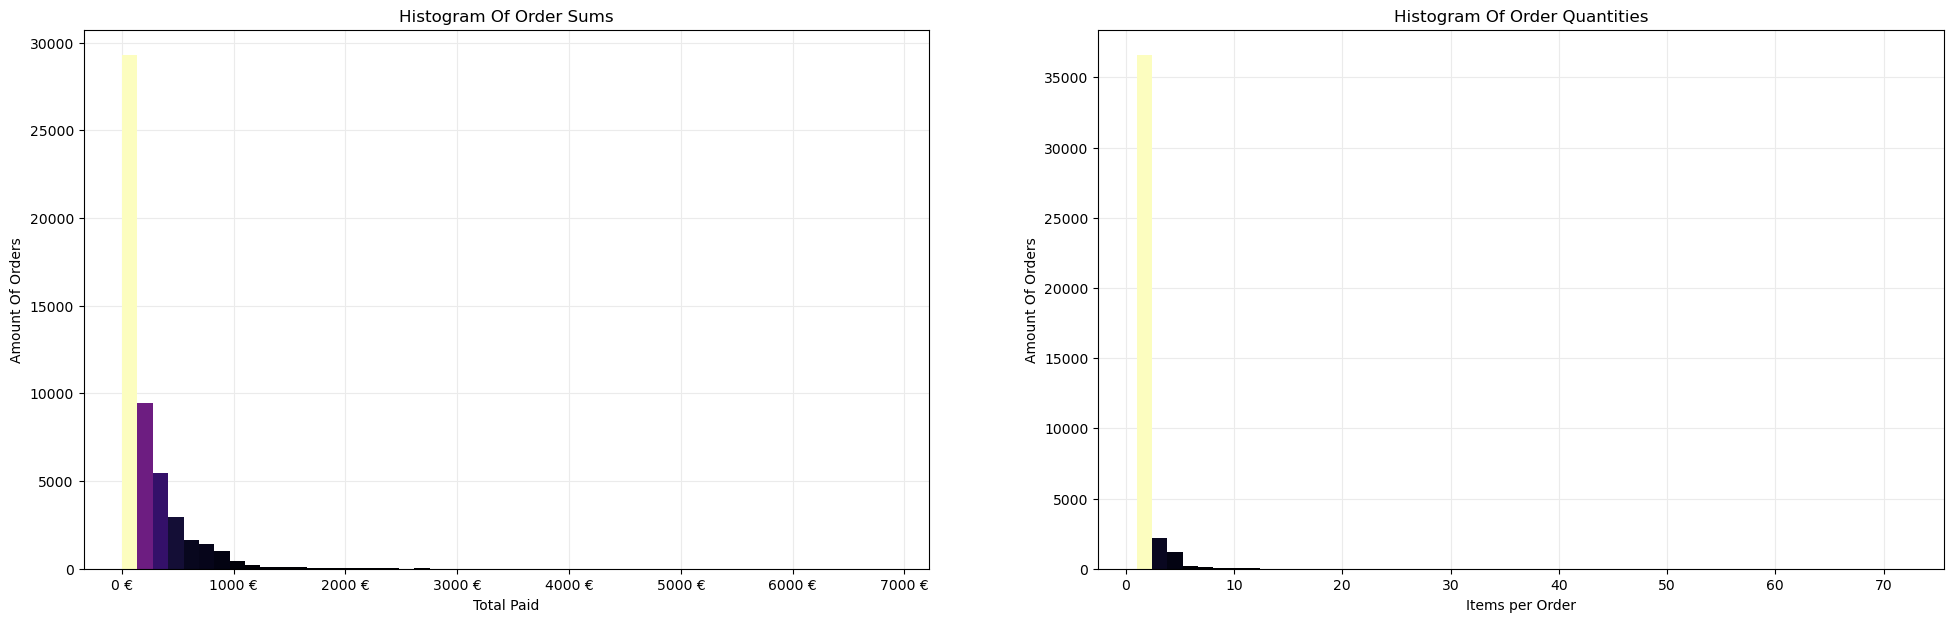

In [41]:
b = 50

# Open figure, set sizes
fig, ax = plt.subplots(1,2,figsize=(24,7))
# Select colormap
cm = plt.get_cmap("magma")

# --- HISTOGRAM 1
# Get amp-values, patch-x-values (lower left corner) and patch-container
amps, bins, patches = ax[0].hist(orders['total_paid'],bins=b)

# Annotate plot
ax[0].xaxis.set_major_formatter('{x:1.0f} €')
ax[0].set_xlabel('Total Paid')
ax[0].set_title('Histogram Of Order Sums')

# scale values to interval [0,1]
col = amps - min(amps)
col /= max(col)

# Colormap histogram patches
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

# --- HISTOGRAM 2
# Get quantities per order
OL_quantities = orderlines.groupby('order_id',as_index=False).agg({'product_quantity':'sum'}).drop(columns='order_id')

# Get amp-values, patch-x-values (lower left corner) and patch-container
amps, bins, patches = ax[1].hist(OL_quantities,bins=b)

# Annotate plot
ax[1].set_xlabel('Items per Order')
ax[1].set_title('Histogram Of Order Quantities')

# scale values to interval [0,1]
col = amps - min(amps)
col /= max(col)

# Colormap histogram patches
for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))

    
for i in range(0,2):
    ax[i].set_ylabel('Amount Of Orders')
    ax[i].grid(color=[0.92,0.92,0.92])
    ax[i].set_axisbelow(True) # Plot grid etc. behind plot elements
    

## Direct Comparisons

In [43]:
# --- AGGREGATE ORDERS TABLE
ORD_agg = (
    orders
    .groupby(orders['created_date'].dt.to_period(period))
    .agg({'total_paid':['sum','mean','median'],'order_id':'count'})
    .rename(columns={'order_id':'order_count'})
)

# --- AGGREGATE ORDERLINES TABLE
OL_agg = (
    orderlines
    .groupby(orders['created_date'].dt.to_period(period))
    .agg({'unit_price':'mean','product_price':'mean','unit_price_total':'sum','product_price_total':'sum'})
)

# Add price_ratio column to OL_agg
OL_agg['price_ratio'] = 1 - OL_agg['unit_price_total']/OL_agg['product_price_total']

### Quantities/Revenue vs. Discounts

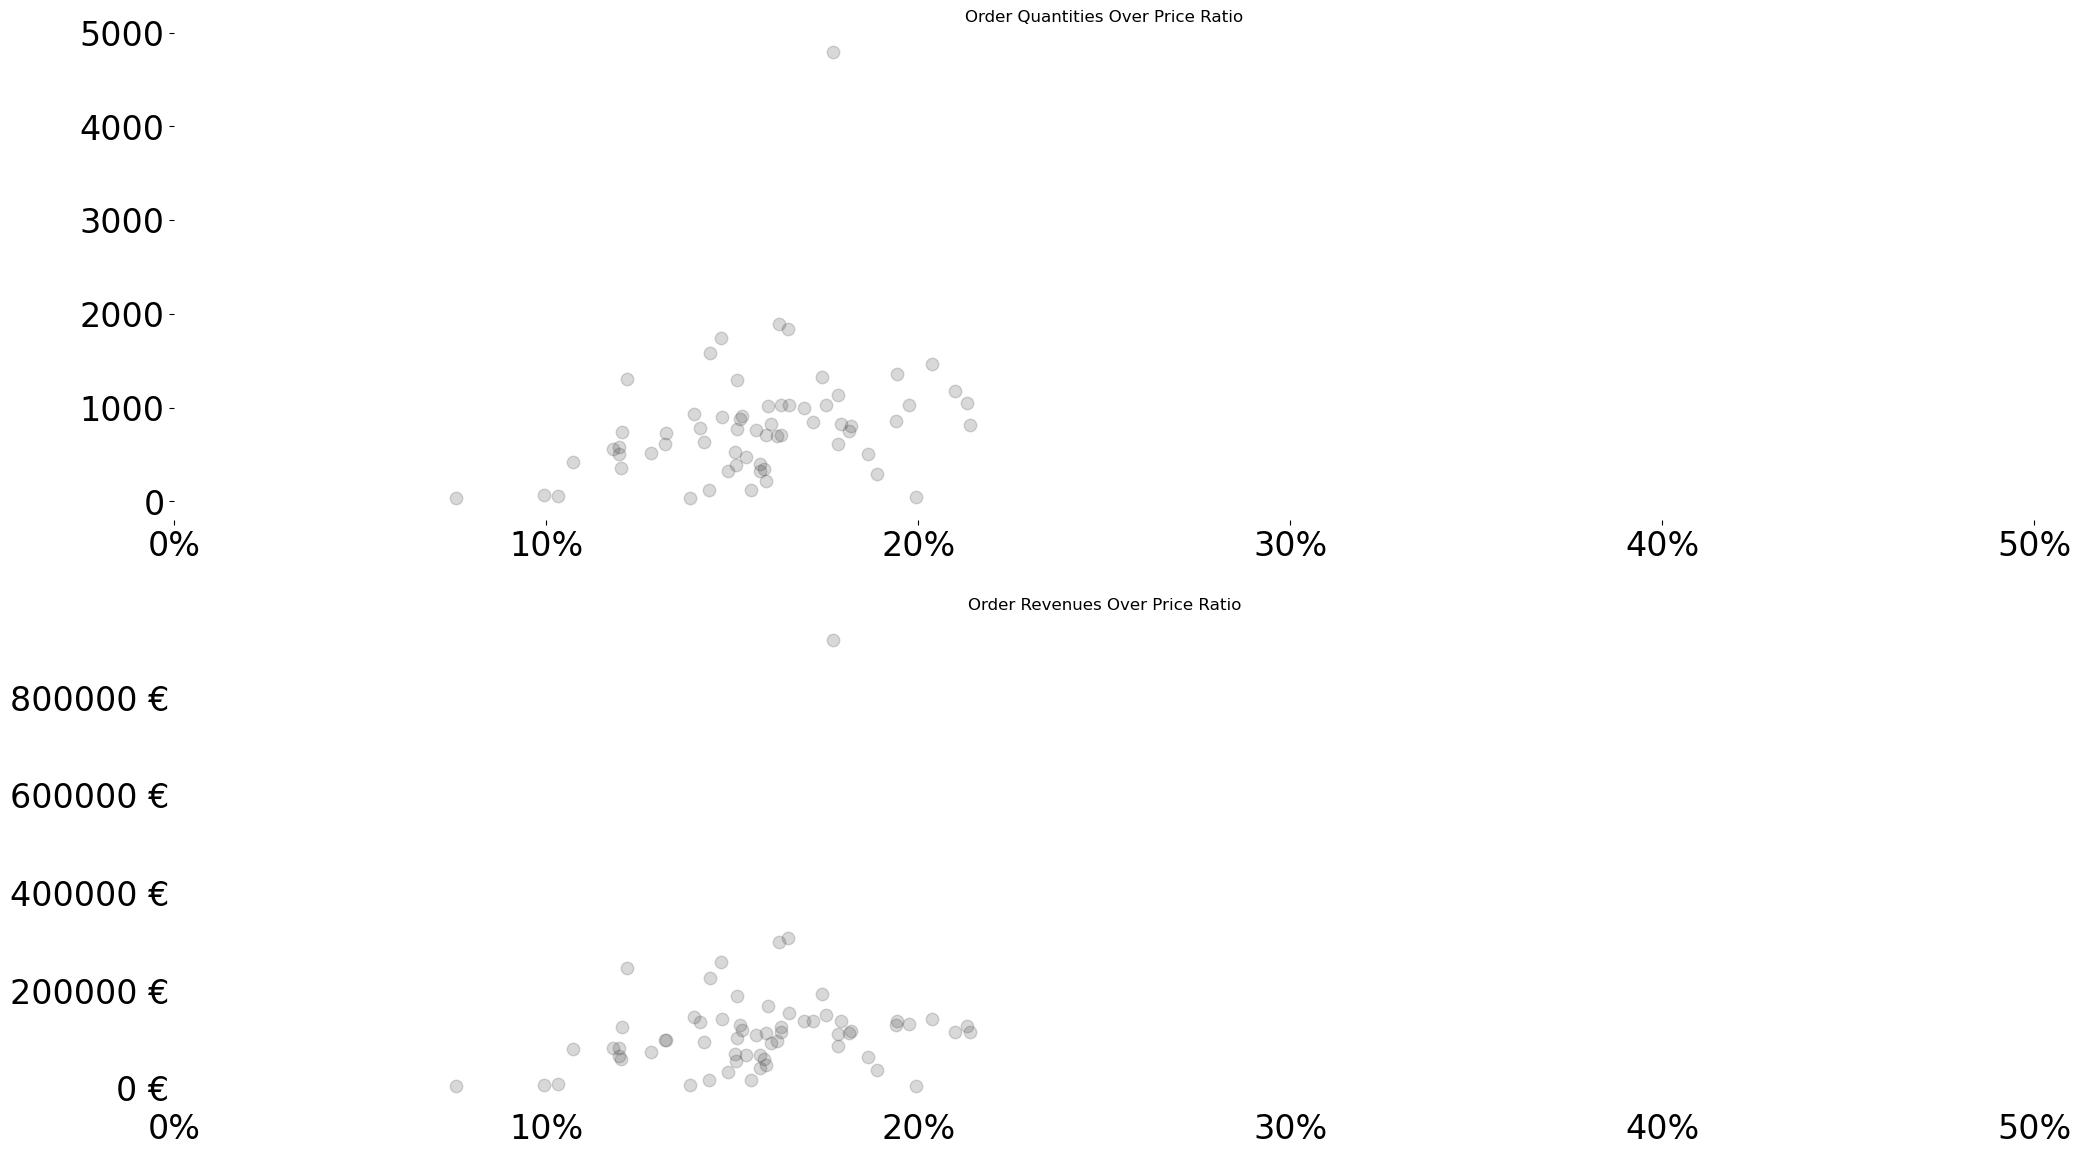

In [65]:
# --- OPEN FIGURE AND SET SIZE
fig, ax = plt.subplots(2,1,figsize=(24,14))

# Define values to plot
x = OL_agg['price_ratio']
y0 = ORD_agg['order_count']
y1 = OL_agg['unit_price_total']

# Polyfit to first valueset
p = np.polyfit(x,y0,1)
y0b = np.polyval(p,[0,100])

# Polyfit to second valueset
p = np.polyfit(x,y1,1)
y1b = np.polyval(p,[0,100])

# Plot first and second valueset
ax[0].plot(100*x, y0,'.',markersize=18, color=0.25*np.ones(3), alpha=0.2)
ax[1].plot(100*x, y1,'.',markersize=18, color=0.25*np.ones(3), alpha=0.2)

# Plot fitted polynomials
# ax[0].plot([0,100],y0b/100, '--', color=np.array([75, 0, 250])/255)
# ax[1].plot([0,100],y1b/100, '--', color=np.array([75, 0, 250])/255)

ax[0].set_ylabel('Quantity')
ax[1].set_ylabel('Revenue')

# Set second y-axis to Euros
ax[1].yaxis.set_major_formatter('{x:1.0f} €')

# Add titles
ax[0].set_title('Order Quantities Over Price Ratio')
ax[1].set_title('Order Revenues Over Price Ratio')

plt.tick_params(axis='x', length=0)
plt.tick_params(axis='y', length=0)
plt.minorticks_off()

# Set grid and limits for both plots
for i in range(0,2):
    ax[i].xaxis.set_major_formatter(mtick.PercentFormatter())
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_xlim([0,50])
    # ax[i].grid(color=[0.92,0.92,0.92])
    ax[i].tick_params(axis='both', which='major', labelsize=24)
    for spine in ax[i].spines.values():
        spine.set_visible(False)



### Quantities/Revenue vs. Prices

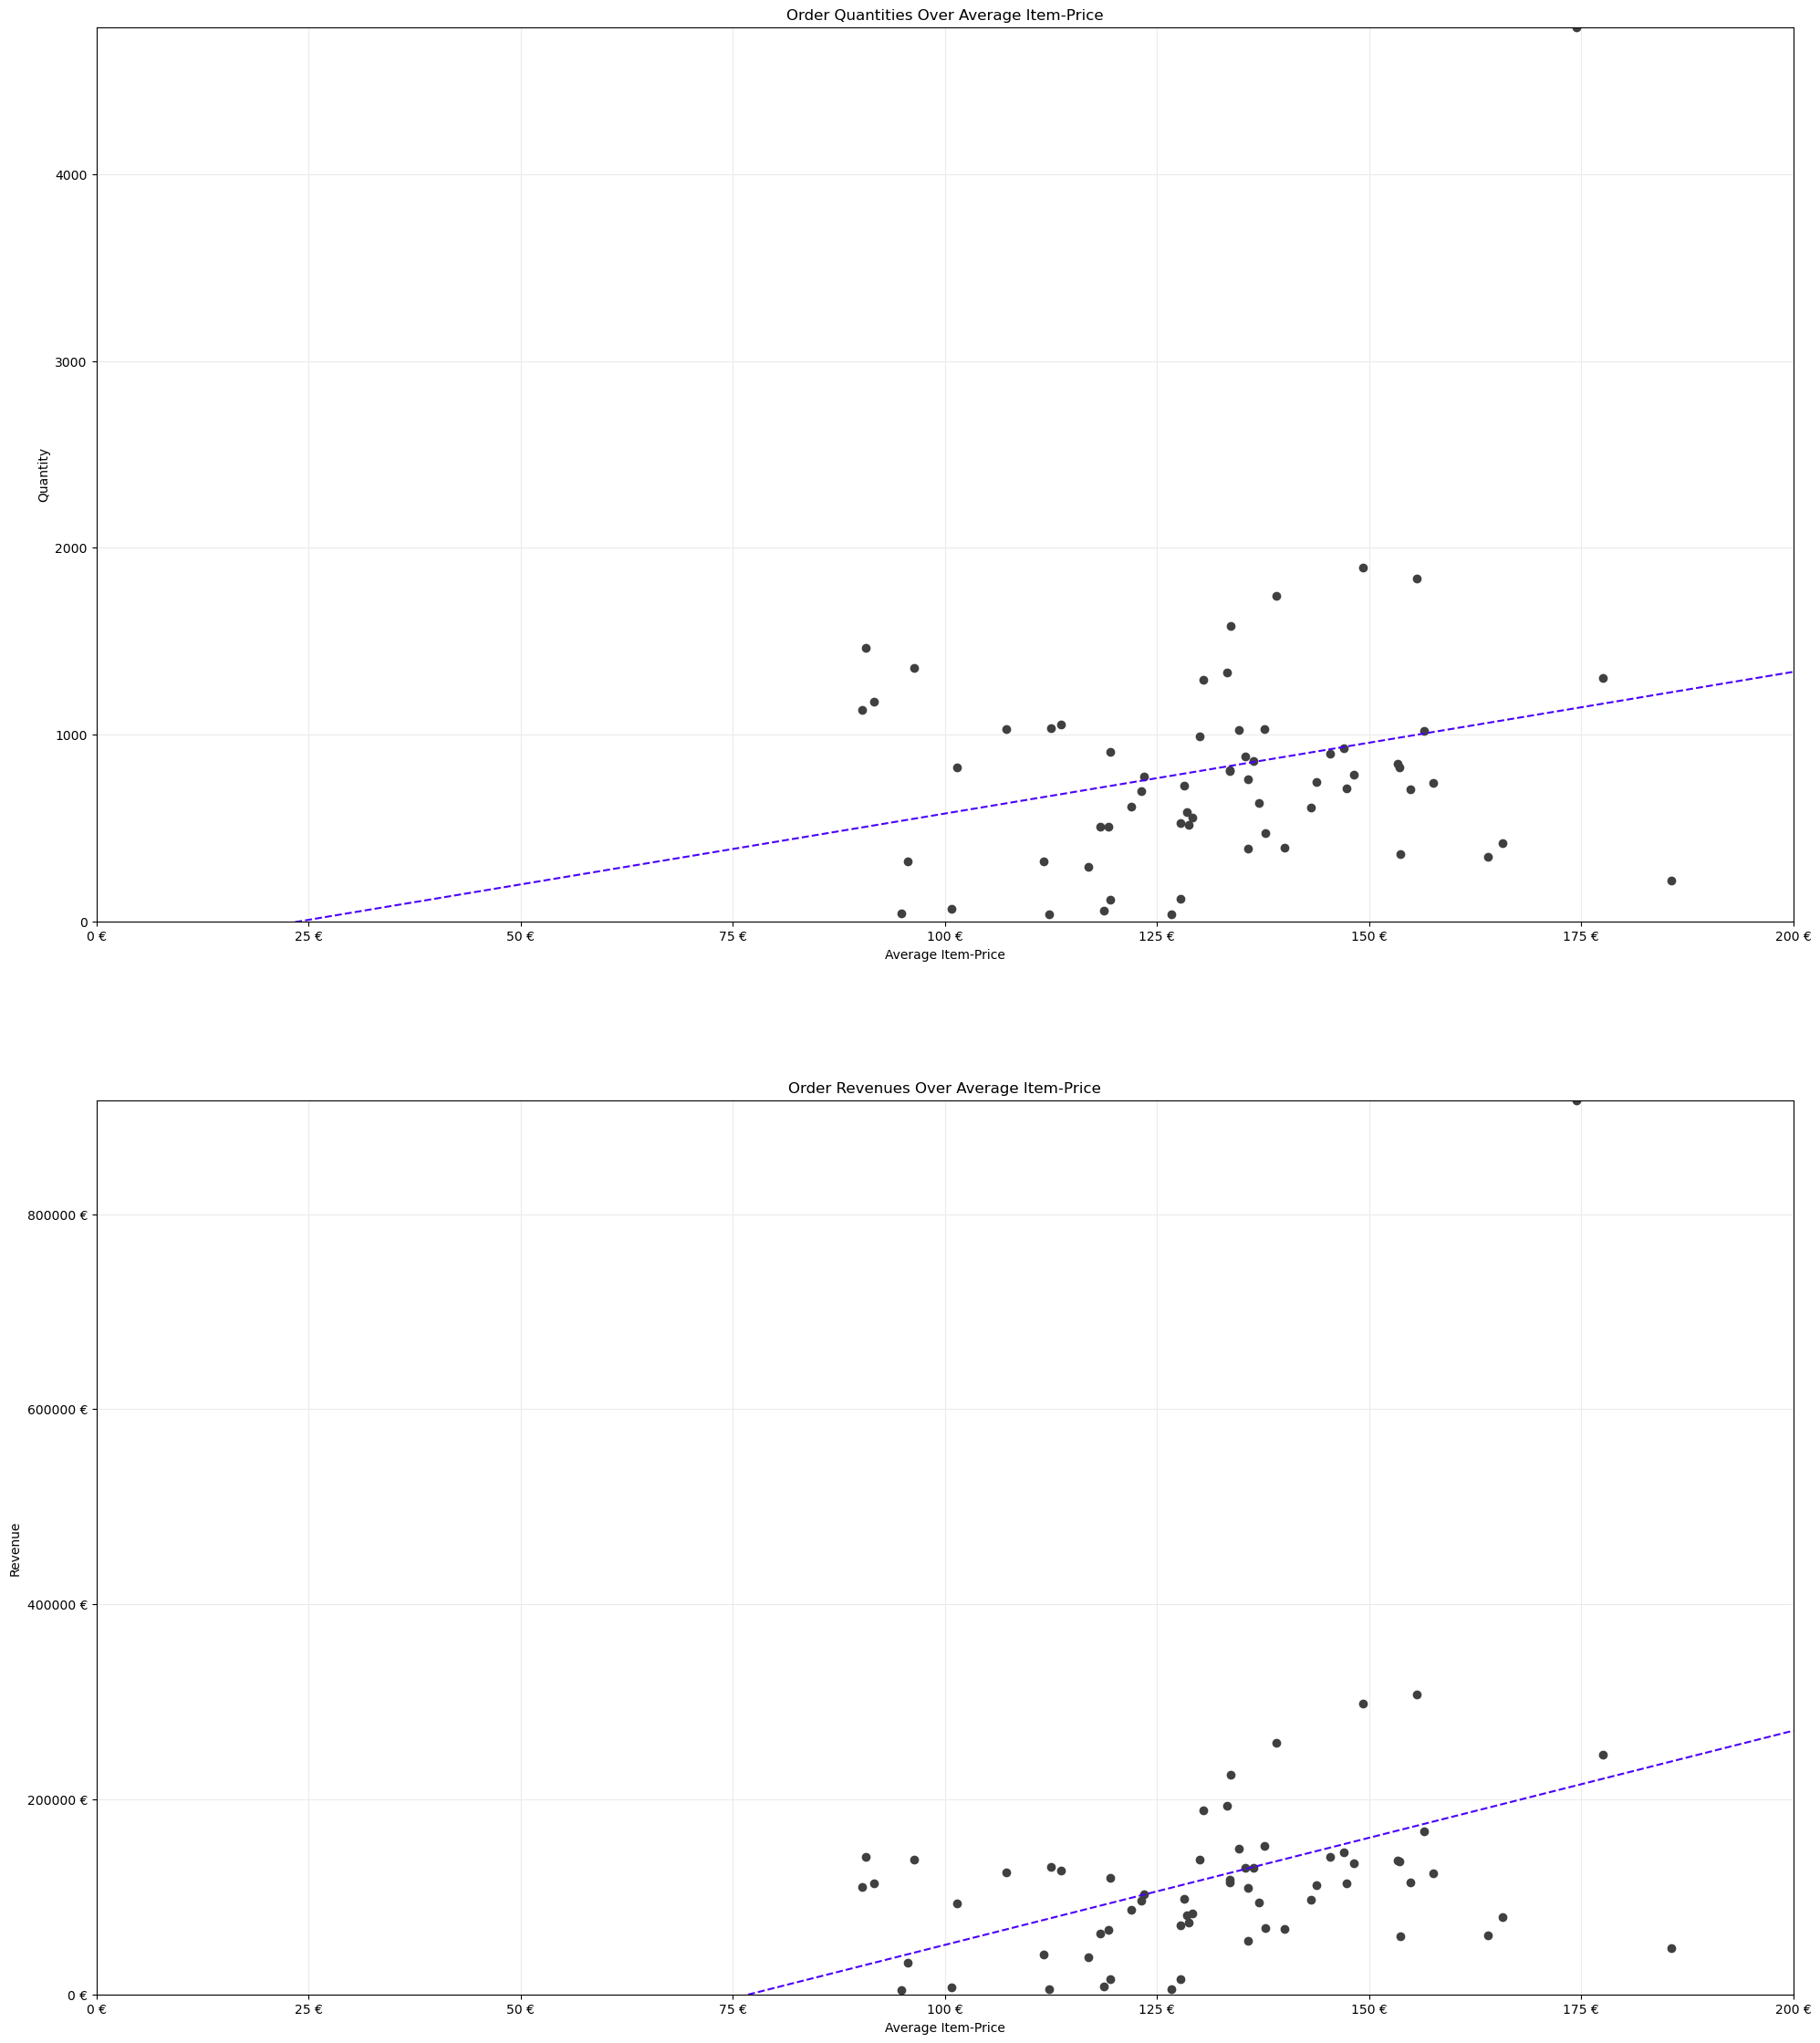

In [42]:
# --- OPEN FIGURE AND SET SIZE
fig, ax = plt.subplots(2,1,figsize=(24,28))

# Define values to plot
x = OL_agg['unit_price']
y0 = ORD_agg['order_count']
y1 = OL_agg['unit_price_total']

# Set limit for x-axis
xmax = 200;

# Polyfit to first valueset
p = np.polyfit(x,y0,1)
y0b = np.polyval(p,[0,xmax])

# Polyfit to second valueset
p = np.polyfit(x,y1,1)
y1b = np.polyval(p,[0,xmax])

# Plot first and second valueset
ax[0].plot(x, y0,'.',markersize=12, color=0.25*np.ones(3))
ax[1].plot(x, y1,'.',markersize=12, color=0.25*np.ones(3))

# Plot fitted polynomials
ax[0].plot([0,xmax],y0b, '--', color=np.array([75, 0, 250])/255)
ax[1].plot([0,xmax],y1b, '--', color=np.array([75, 0, 250])/255)

# Set limits to both y-axes
ax[0].set_ylim([0, y0.max()[0]])
ax[1].set_ylim([0, y1.max()])

# Label both y-axes
ax[0].set_ylabel('Quantity')
ax[1].set_ylabel('Revenue')

# Set second y-axis to Euros
ax[1].yaxis.set_major_formatter('{x:1.0f} €')

# Set plot-titles
ax[0].set_title('Order Quantities Over Average Item-Price')
ax[1].set_title('Order Revenues Over Average Item-Price')

# Set grid and limits for both plots
for i in range(0,2):
    ax[i].xaxis.set_major_formatter('{x:1.0f} €')
    ax[i].set_xlabel('Average Item-Price')
    ax[i].set_xlim([0,xmax])
    ax[i].grid(color=[0.92,0.92,0.92])



## Comparisons over time

### Quantities vs. Prices over time

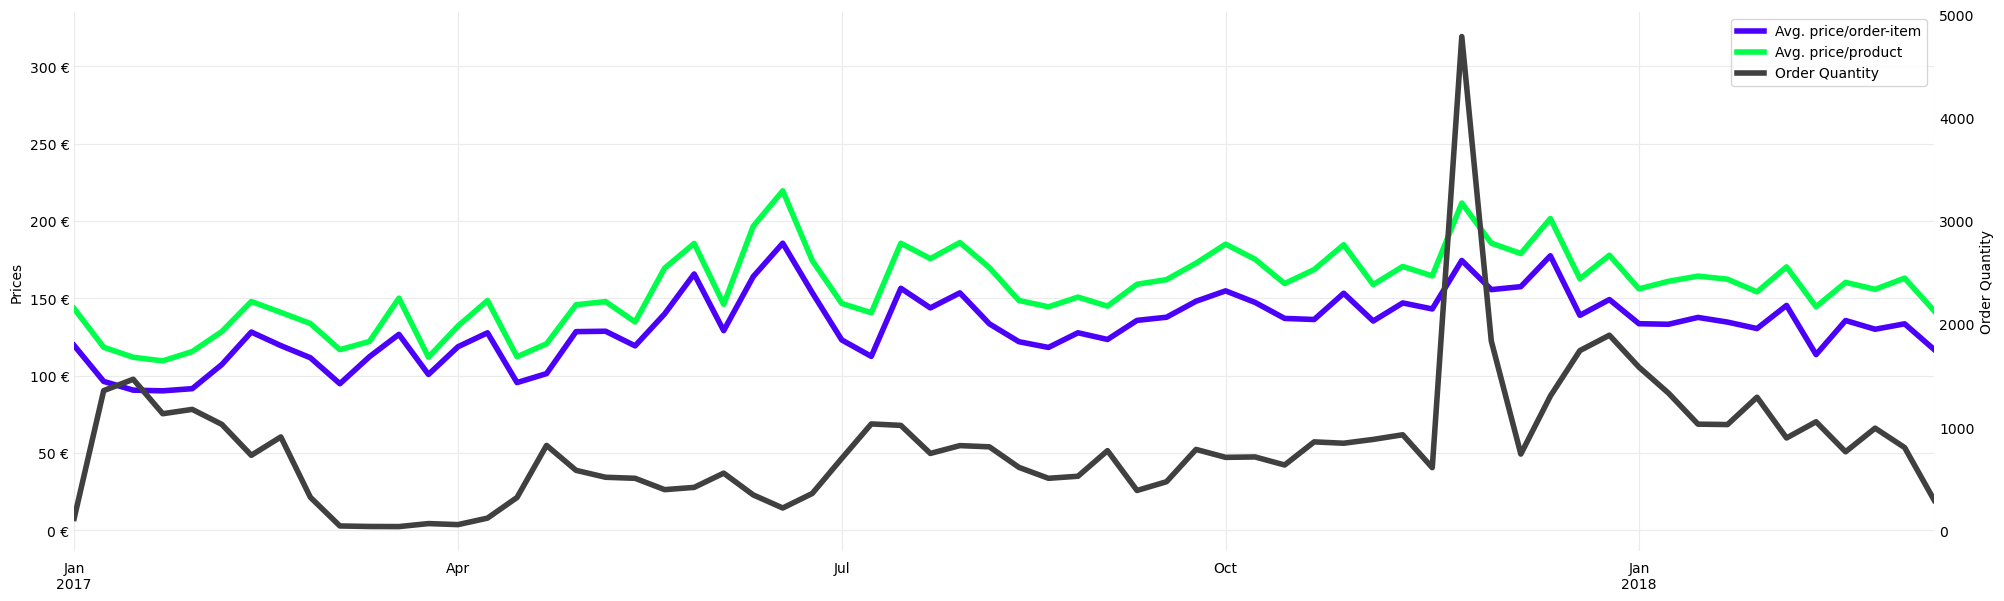

In [205]:
# --- OPEN FIGURE AND SET SIZE
fig, ax = plt.subplots(figsize=(24,7))

# Scale count-values for plotting
scalecount = 15;

lw = 4;

# Define values to plot
ax = OL_agg['unit_price'].plot(color=np.array([75, 0, 250])/255,linewidth=lw)
ax = OL_agg['product_price'].plot(color=np.array([0, 255, 75])/255,linewidth=lw)
ax = (ORD_agg['order_count']['count']/scalecount).plot(color=np.ones(3)*0.25,linewidth=lw)

# Initialize secondary y axis by scaling corresponding values from first y-axis
secax = ax.secondary_yaxis('right',functions=(lambda x: scalecount*x, lambda x: x / scalecount))

ax.yaxis.set_major_formatter('{x:1.0f} €')

customplots.declutter(ax)
customplots.declutter(secax)

ax.set_ylabel('Prices')
secax.set_ylabel('Order Quantity')

# Add legend and grid
ax.legend(['Avg. price/order-item', 'Avg. price/product','Order Quantity'])
ax.grid(color=[0.92,0.92,0.92])


### Quantities vs. Discounts over time

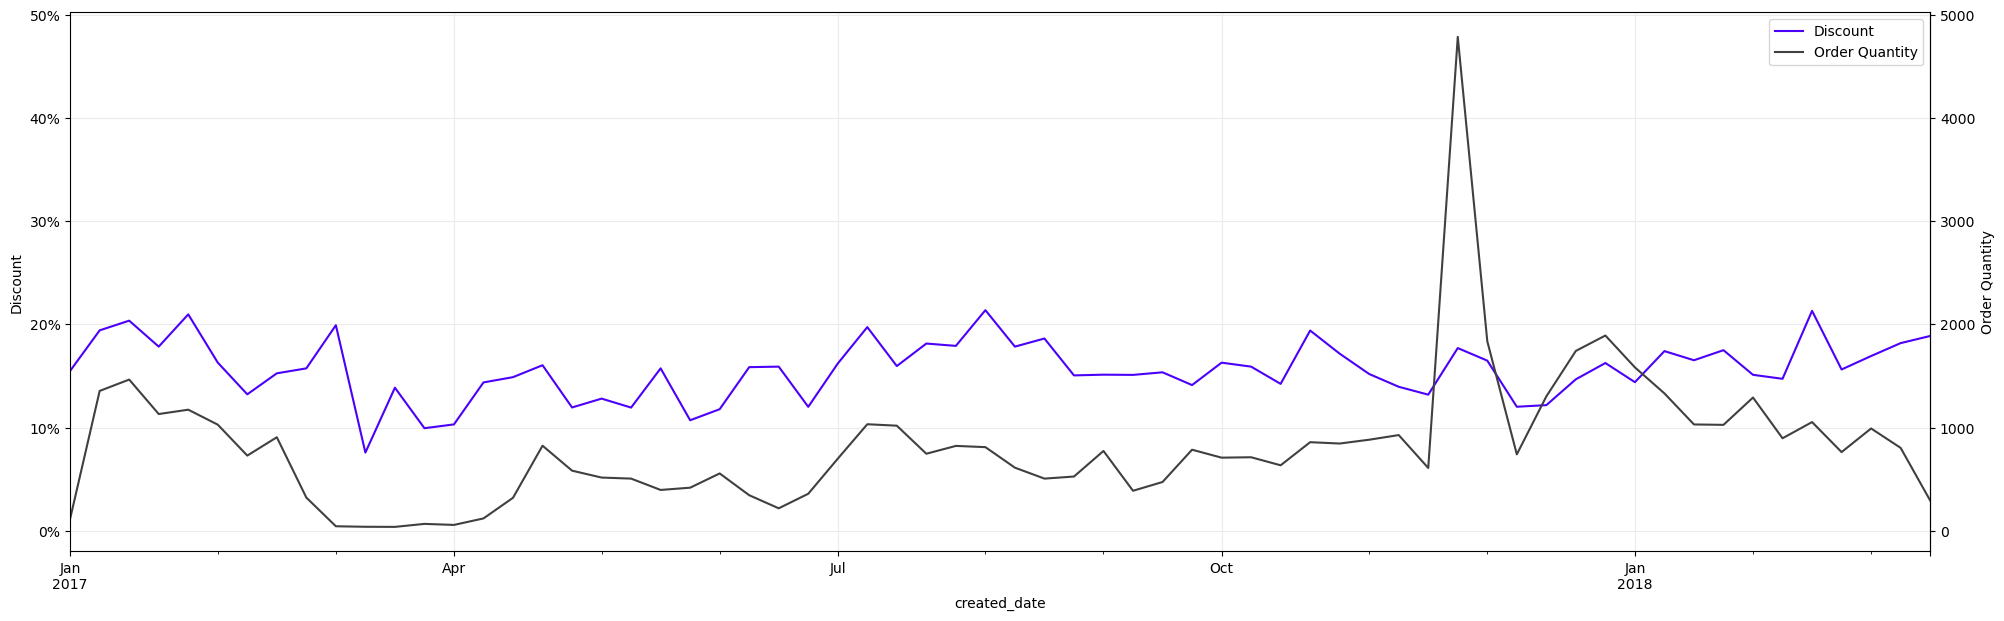

In [47]:
fig, ax = plt.subplots(figsize=(24,7))

scalecount = 100;

ax = (100*OL_agg['price_ratio']).plot(color=np.array([75, 0, 250])/255)
ax = (ORD_agg['order_count']['count']/scalecount).plot(color=np.ones(3)*0.25)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Initialize secondary y axis by scaling corresponding values from first y-axis
secax = ax.secondary_yaxis('right',functions=(lambda x: scalecount*x, lambda x: x / scalecount))

ax.set_ylabel('Discount')
secax.set_ylabel('Order Quantity')

ax.legend(['Discount','Order Quantity'])
ax.grid(color=[0.92,0.92,0.92])

plt.show()

### Revenue vs. Discounts over time

,unit_price,product_price,unit_price_total,product_price_total,price_ratio
created_date,,,,,
2018-02-26/2018-03-04,130.059506,155.861653,138266.95,166471.19,0.169424
2018-03-05/2018-03-11,133.566791,163.097637,117764.62,143955.04,0.181935
2018-03-12/2018-03-18,116.936905,141.938333,37666.89,46436.59,0.188853


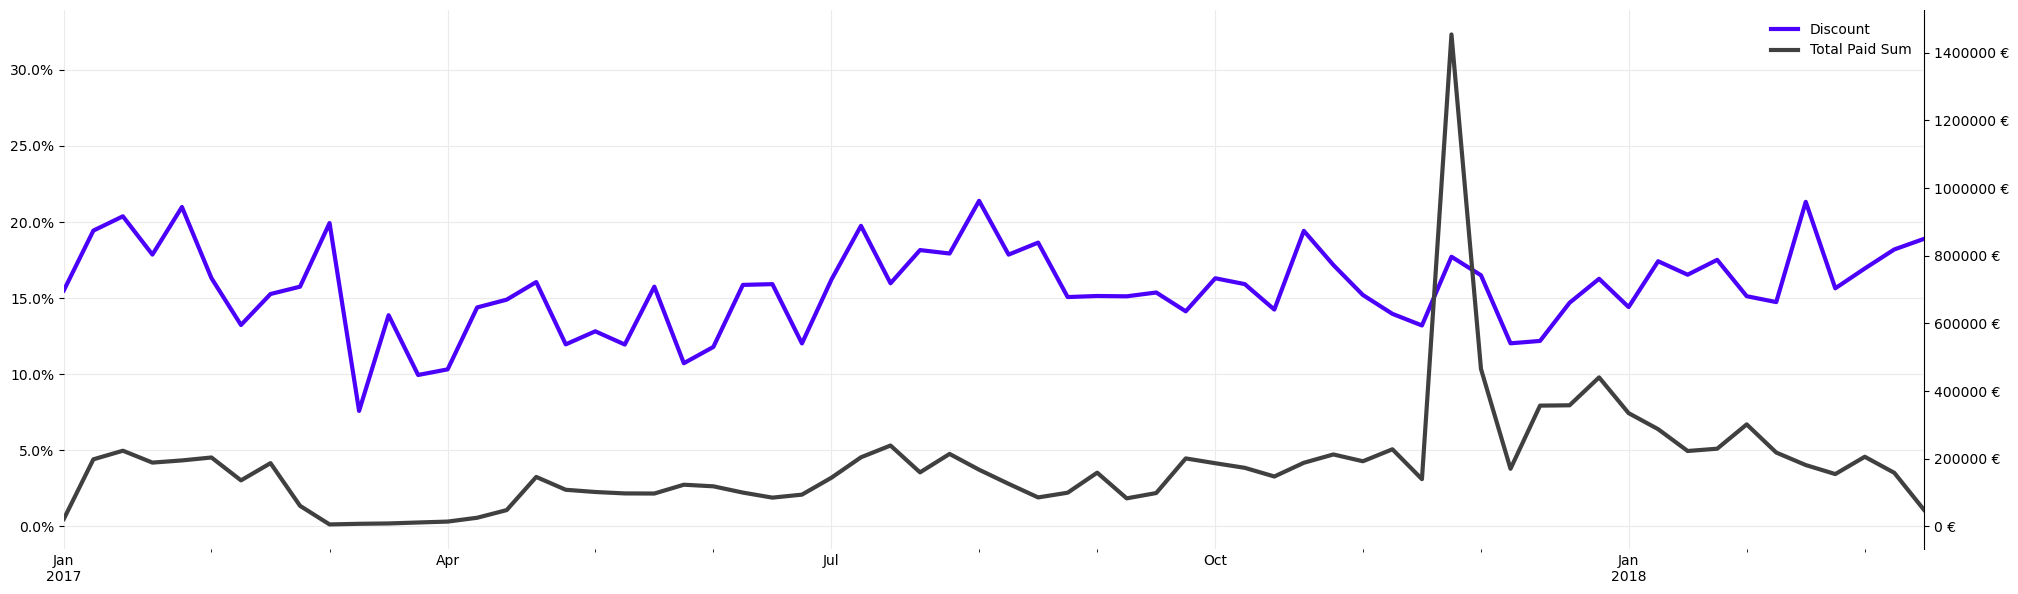

In [49]:
fig, ax = plt.subplots(figsize=(24,7))

# To scale second graph
scalecount = 45000;
# Linewidth of graphs
lw = 3;

ax = (100*OL_agg['price_ratio']).plot( color=np.array([75, 0, 250])/255, linewidth=lw )
ax = (ORD_agg['total_paid']['sum']/scalecount).plot(color=np.ones(3)*0.25, linewidth=lw )

# Initialize secondary y axis by scaling corresponding values from first y-axis
secax = ax.secondary_yaxis('right',functions=(lambda x: scalecount*x, lambda x: x / scalecount))

# Format yaxes to display percentage and euros
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
secax.yaxis.set_major_formatter('{x:1.0f} €')

ax.get_yticklabels()[0].set_color(np.array([75, 0, 250])/255)

# ax.set_ylabel('Discount')
# secax.set_ylabel('Total Paid Sum')


ax.grid(color=[0.92,0.92,0.92])
ax.set_xlabel('')
ax.set_ylabel('')

ax.tick_params(axis='x', length=0)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
    
ax.legend(['Discount','Total Paid Sum'],frameon=False)

OL_agg.tail(3)

In [50]:
ORD_agg.head(2)

total_paid                    order_count
                             sum        mean median       count
created_date                                                   
2016-12-26/2017-01-01   21930.69  185.853305  80.36         118
2017-01-02/2017-01-08  198115.13  146.102603  73.97        1356

<Axes: >

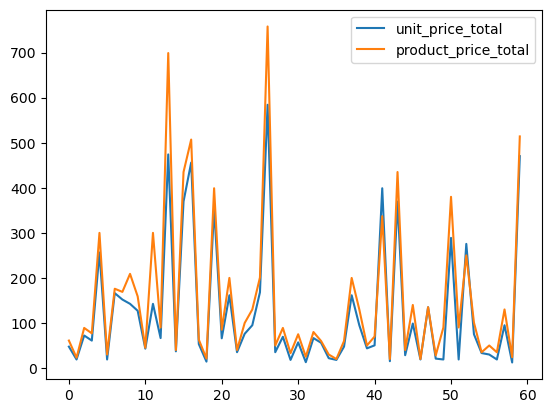

In [51]:
orderlines.iloc[0:60,9:11].plot()

# Regression for all product types

## Regression-Plots

### Quantity

C:\Users\Patrick\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


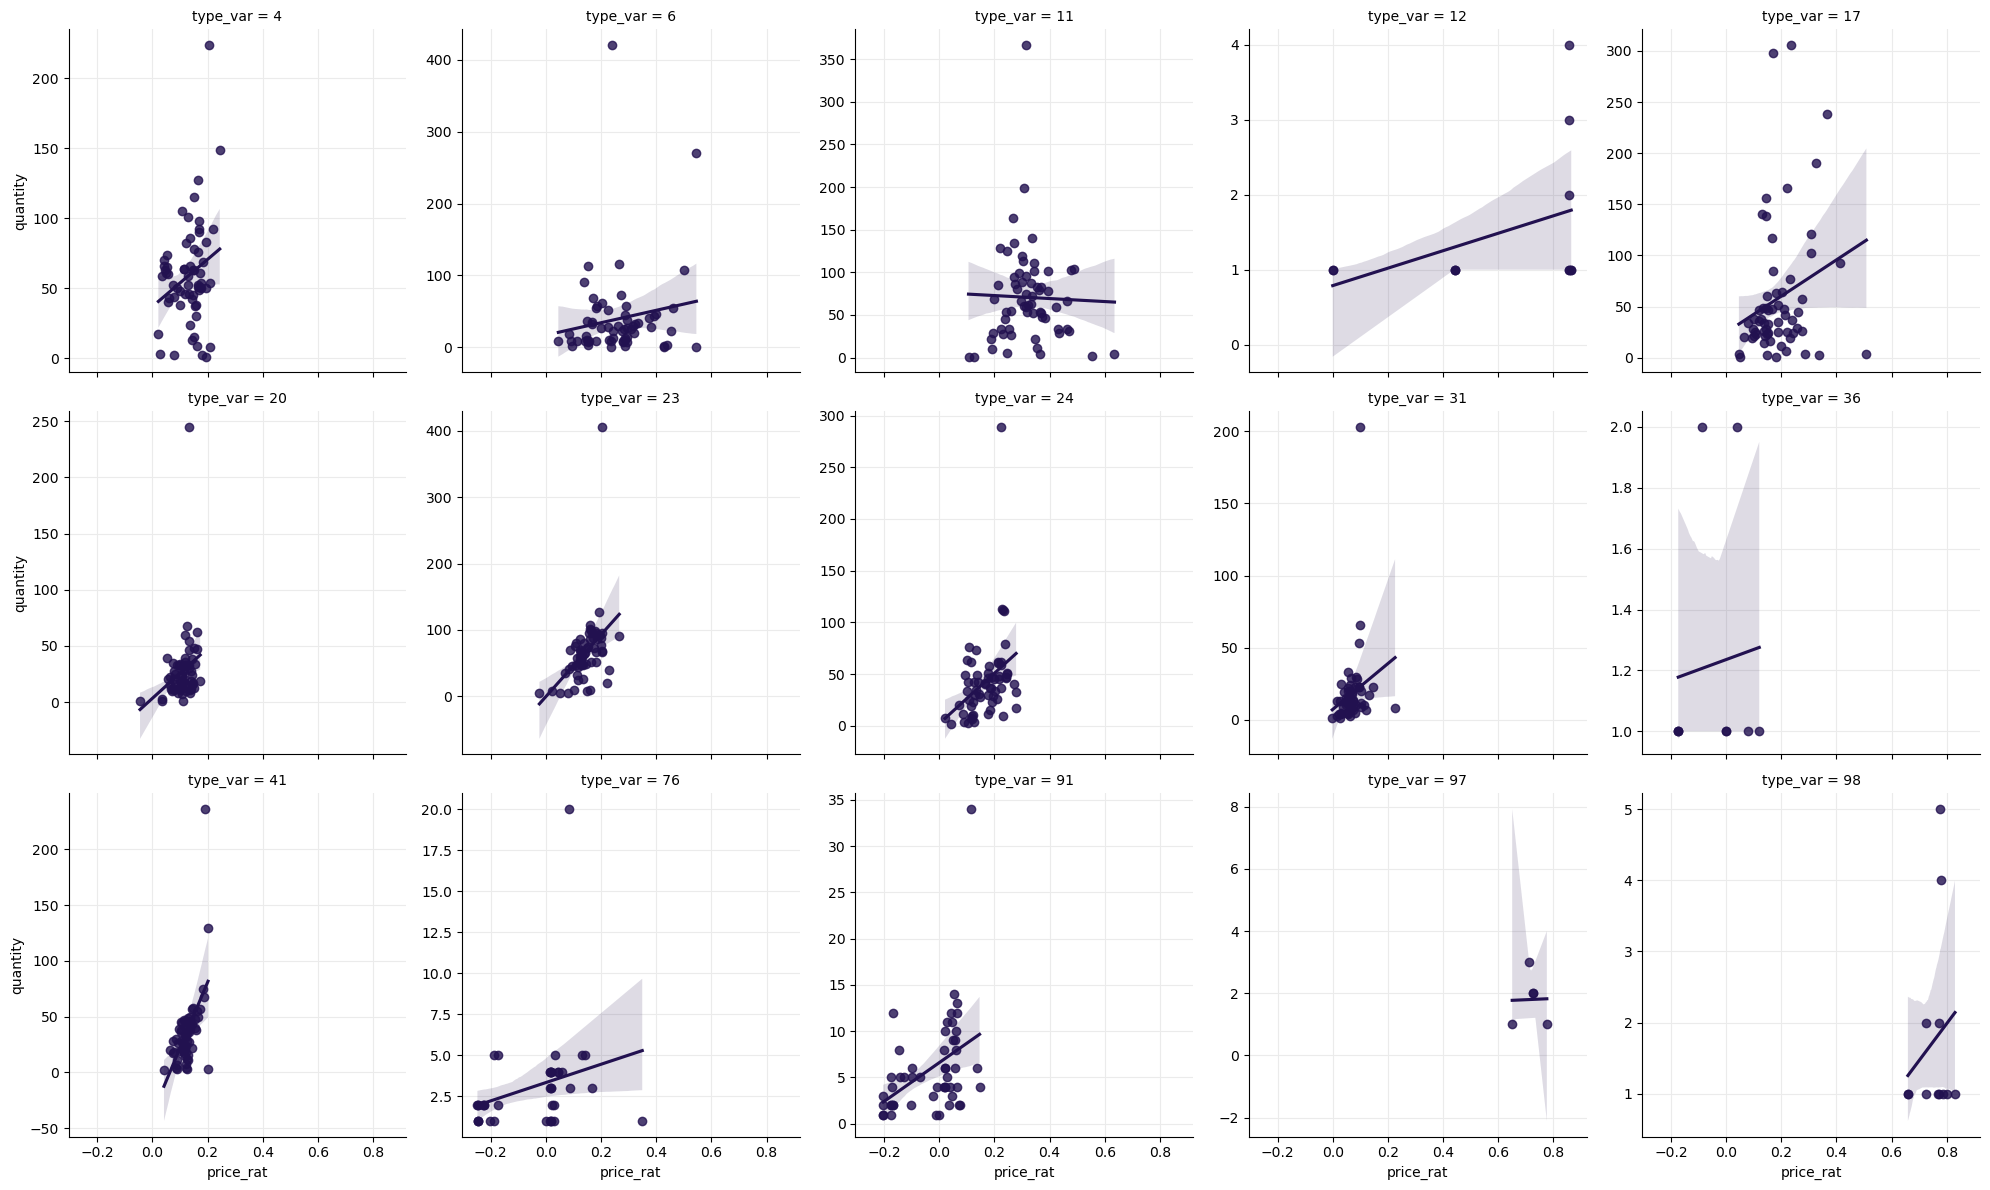

In [55]:
df = OL_type[OL_type['type_var'].isin(typeselect)]

df = (
    df
    .groupby(['type_var', df['created_date'].dt.to_period(period)])
    .agg({'price_rat':'mean','product_quantity':'sum','unit_price_total':'sum'})
    .rename(columns={'unit_price_total':'revenue','product_quantity':'quantity'})
    .reset_index()
)

sns.set_palette("magma")
lm = sns.lmplot(
    data=df,
    x='price_rat',
    y='quantity',
    col='type_var',
    col_wrap = 5,
    height = 4,
    aspect = 1,
    facet_kws=dict(sharey=False)
)

for ax in lm.axes.flat:
    ax.grid(color=[0.92,0.92,0.92])
    ax.set_axisbelow(True) # Plot grid etc. behind plot elements

### Revenue

C:\Users\Patrick\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


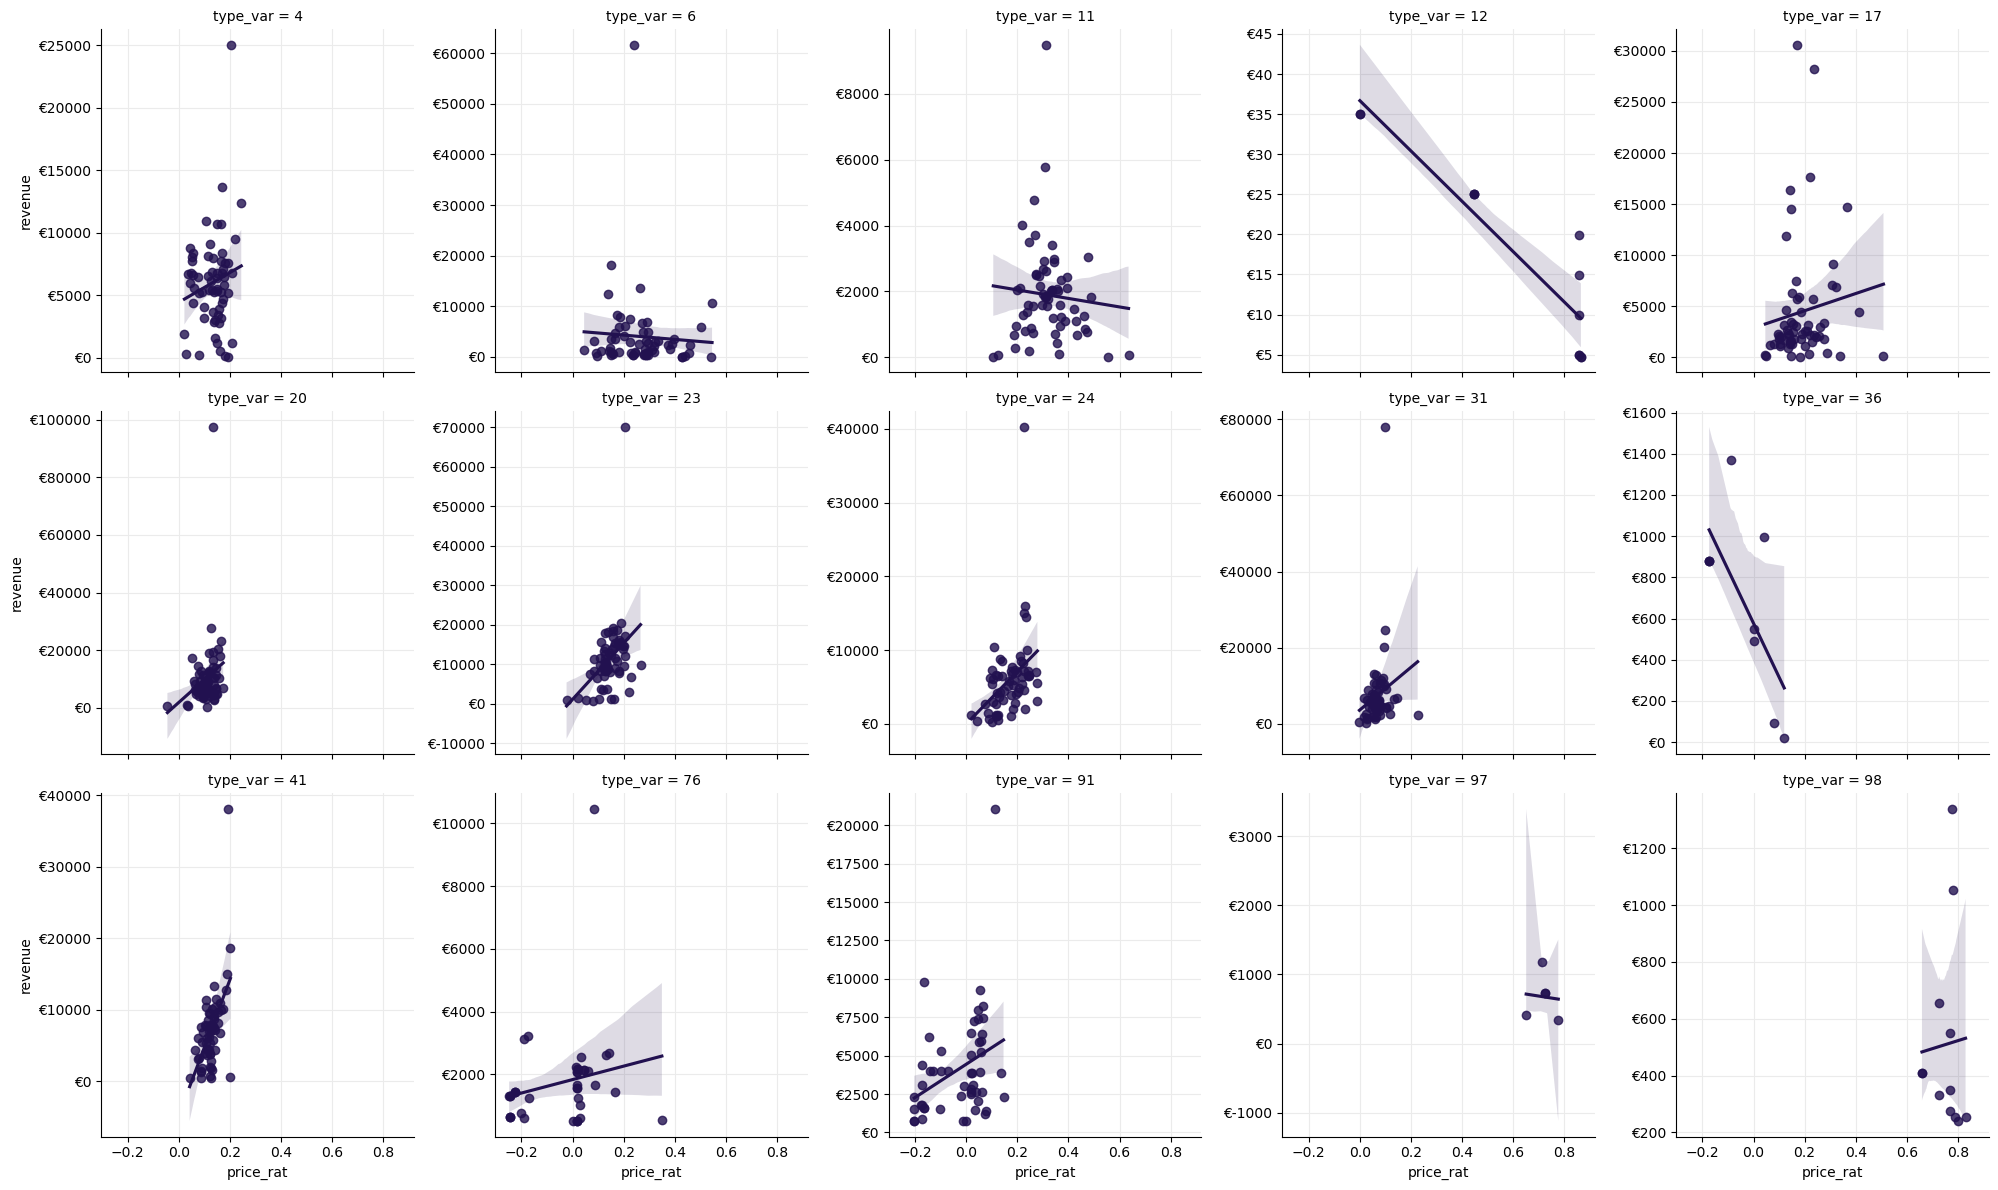

In [57]:
df = OL_type[OL_type['type_var'].isin(typeselect)]

df = (
    df
    .groupby(['type_var', df['created_date'].dt.to_period(period)])
    .agg({'price_rat':'mean','product_quantity':'sum','unit_price_total':'sum'})
    .rename(columns={'unit_price_total':'revenue','product_quantity':'quantity'})
    .reset_index()
)

sns.set_palette("magma")
lm = sns.lmplot(
    data=df,
    x='price_rat',
    y='revenue',
    col='type_var',
    col_wrap = 5,
    height = 4,
    aspect = 1,
    facet_kws=dict(sharey=False)
)

for ax in lm.axes.flat:
    formatter = mtick.FormatStrFormatter('€%.0f')
    ax.yaxis.set_major_formatter(formatter)
    ax.grid(color=[0.92,0.92,0.92])
    ax.set_axisbelow(True) # Plot grid etc. behind plot elements

## Numeric Regression

### R² values for Quantity and Revenue

- Linear regression for individual producttypes is evaluated using quantity and revenue over discount.
- Quantity is measured as sum of products sold per week.
- Revenue is measured as sum of unit_price_total (=product quantity of an orderline times unit_price)

In [60]:
# Get orderlines including type-information
df = OL_type

# Make new DF grouping over timeperiod and aggregating quantities and revenues
df = (
    df
    .groupby(['type_var', df['created_date'].dt.to_period(period)])
    .agg({'price_rat':'mean','product_quantity':'sum','unit_price_total':'sum'})
    .rename(columns={'unit_price_total':'revenue','product_quantity':'quantity'})
    .reset_index()
)

# Make new DF to write regression values to
OL_regression = pd.DataFrame()

# Index for filling up the regression DF
ind = 0
# Go through aggregated orderlines by product-type
for tv in df['type_var'].unique():
    OL_regression.loc[ind,'type'] = tv
    # Get x-values from data
    x = df[df['type_var']==tv]['price_rat'].values.reshape(-1,1)
    # Save coef
    OL_regression.loc[ind,'samples'] = len(x)
    # --- DO IT TWICE FOR BOTH QUANTITY AND REVENUE
    for i in range(0,2):
        # Select type
        if (i==0):
            col = 'quantity'
        else:
            col = 'revenue'
        # Select y-values
        y = df[df['type_var']==tv][col].values.reshape(-1,1)
        # Do linear fit
        lin_model = LinearRegression()
        lin_model.fit(x,y)
        # Save coef
        OL_regression.loc[ind,('coef' + '_' + col)] = lin_model.coef_[0]
        # Predict to get r-squared
        y_pred = lin_model.predict(x)
        OL_regression.loc[ind,('r2' + '_' + col)] = r2_score(y,y_pred)
    # Increment ind for next loop
    ind += 1

# Set these columns as integers, as they are floar by defaults
OL_regression['type'] = OL_regression['type'].astype(int)
OL_regression['samples'] = OL_regression['samples'].astype(int)

# Only take results with at least 33 samples (IQR=16, Med=57 -> 33=57-1.5*16)
OL_regression = OL_regression[OL_regression['samples']>25]

# Print top 10 regressions
OL_regression.nlargest(10,'r2_revenue')

# OL_regression['samples'].describe()

C:\Users\Patrick\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Patrick\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Patrick\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\Patrick\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


,type,samples,coef_quantity,r2_quantity,coef_revenue,r2_revenue
41,41,64,589.516283,0.322769,94860.290341,0.303427
43,43,59,98.747404,0.277487,1460.806164,0.254664
38,38,61,191.850196,0.270192,15660.803436,0.243385
78,80,47,120.688781,0.274084,51171.878693,0.223780
46,47,57,105.647762,0.324512,1463.715129,0.218390
96,100,30,27.553581,0.260213,2298.040282,0.190448
9,9,61,67.854667,0.371114,1235.227559,0.189325
58,59,55,89.420553,0.310596,1880.432726,0.181451
34,34,61,269.178977,0.213716,44249.454230,0.169261
0,0,57,47.167716,0.360940,1429.617489,0.159573


### Top 10 R² values compared

->
It makes a difference if you plot by type_var (numeric identifier) or by desc2 (Keywords from Gemini AI).<br>
Apparently Gemini already assigned the same keywords to two different type_var's.<br>
So when plotting by desc2, Seaborn will automatically group and you end up with Top 9 instead of Top 10.

Text(0, 0.5, '')

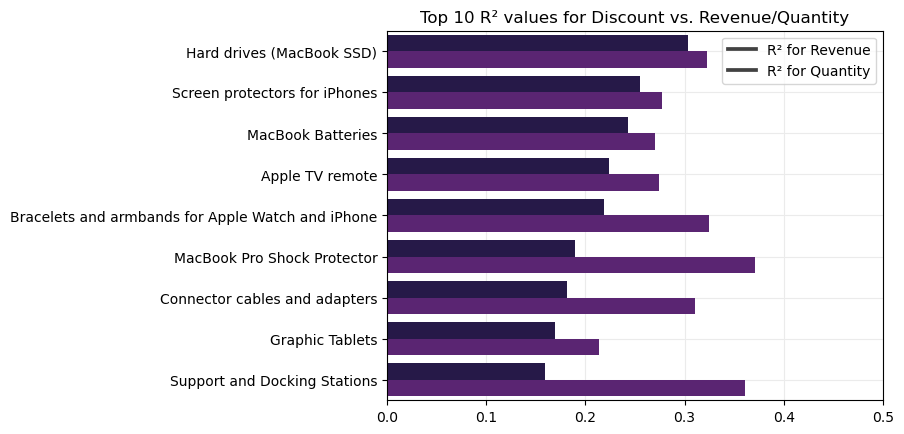

In [62]:
# --- MAKE NEW DF TO PLOT
dfplot = OL_regression.nlargest(10,'r2_revenue')

# --- PREPARE DF TO PLOT
# Sets R^2 value to negative in case corresponding revenues are negative
dfplot['r2_rev_sign'] = np.sign(dfplot['coef_revenue'])*dfplot['r2_revenue']
dfplot['r2_qua_sign'] = np.sign(dfplot['coef_quantity'])*dfplot['r2_quantity']
# Reorder/"Pivot" DF in a way that instead of 2 columns of r2 values there's now 1 column containing both, and an additional "identifying" column
dfplot = dfplot.reset_index(names='type_var').melt(id_vars='type_var', var_name='Variable', value_name='r2_val')
# Get rid of rows containing just the type
dfplot = dfplot[dfplot['Variable'].isin(['r2_rev_sign','r2_qua_sign'])]
# r2_val was made to "object" because of the "melt"-method before. transform it back to float so the column can be sorted
dfplot['r2_val'] = dfplot['r2_val'].astype(float)
# Sort values for plotting
dfplot = dfplot.sort_values(['Variable','r2_val'],ascending=False)
# Merge in keywords so the can be used as labels instead of type-numbers
# (needs to be done BEFORE converting to string - see below - because else type_var can't be used for merging)
dfplot = dfplot.merge(type_to_keywords,on='type_var',how='left')
# Get the manual descriptions for type_var
dfplot = dfplot.merge(type_to_keywords_m,on='type_var',how='left')
# Convert index to string so seaborn doesn't keep using it for sorting (instead of the values)
dfplot['type_var'] = dfplot['type_var'].astype(str)

# --- MAKE BARPLOT
ax = sns.barplot(
    data=dfplot,
    x='r2_val',
    y='desc_m',
    hue='Variable',
    orient='h',
)

# --- STYLE BARPLOT
ax.set_title('Top 10 R² values for Discount vs. Revenue/Quantity')
ax.grid(color=[0.92,0.92,0.92])
ax.set_axisbelow(True)
ax.set_xlim([0,0.5])
ax.legend(['R² for Revenue','R² for Quantity'])
ax.set_xlabel('')
ax.set_ylabel('')

In [63]:
df = OL_regression[OL_regression['r2_revenue']>0.15]
df = df.rename(columns={'type':'type_var'})

df = df.merge(type_to_keywords_m,on='type_var',how='left')

df.nlargest(10,'r2_revenue')

,type_var,samples,coef_quantity,r2_quantity,coef_revenue,r2_revenue,desc_m
5,41,64,589.516283,0.322769,94860.290341,0.303427,Hard drives (MacBook SSD)
6,43,59,98.747404,0.277487,1460.806164,0.254664,Screen protectors for iPhones
4,38,61,191.850196,0.270192,15660.803436,0.243385,MacBook Batteries
9,80,47,120.688781,0.274084,51171.878693,0.223780,iPads
7,47,57,105.647762,0.324512,1463.715129,0.218390,Power Strips and Connectors
10,100,30,27.553581,0.260213,2298.040282,0.190448,Keypads / Keyboards
1,9,61,67.854667,0.371114,1235.227559,0.189325,MacBook Pro Shock Protector
8,59,55,89.420553,0.310596,1880.432726,0.181451,Backpacks for MacBook Pro
3,34,61,269.178977,0.213716,44249.454230,0.169261,Graphic Tablets
0,0,57,47.167716,0.360940,1429.617489,0.159573,Support and Docking Stations


## Top 10 R² Product Types Plots

### Quantity

C:\Users\Patrick\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


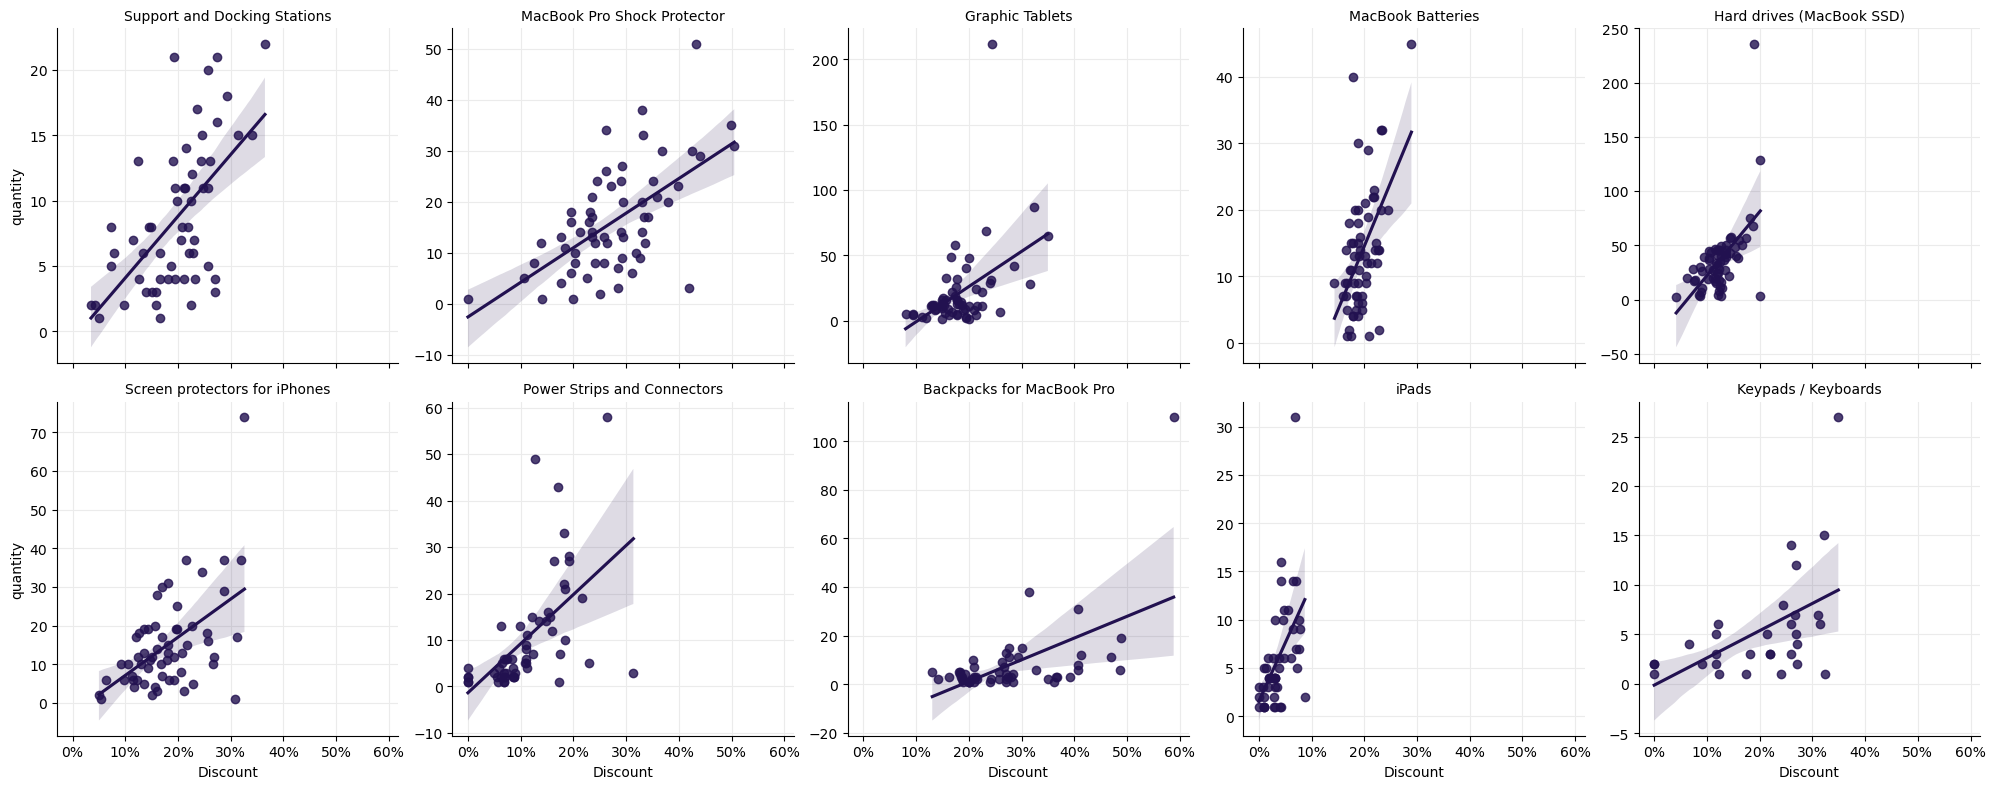

In [66]:
df = OL_type[OL_type['type_var'].isin(OL_regression.nlargest(10,'r2_revenue')['type'])]

df = (
    df
    .groupby(['type_var', df['created_date'].dt.to_period(period)])
    .agg({'price_rat':'mean','product_quantity':'sum','unit_price_total':'sum'})
    .rename(columns={'unit_price_total':'revenue','product_quantity':'quantity'})
    .reset_index()
)

df = df.merge(type_to_keywords_m,on='type_var',how='left')

df['price_rat'] *= 100

sns.set_palette("magma")
lm = sns.lmplot(
    data=df,
    x='price_rat',
    y='quantity',
    col='desc_m',
    col_wrap = 5,
    height = 4,
    aspect = 1,
    facet_kws=dict(sharey=False)
)

lm.set_titles("{col_name}")

for ax in lm.axes.flat:
    ax.set_xlabel('Discount')
    ax.grid(color=[0.92,0.92,0.92])
    ax.set_axisbelow(True) # Plot grid etc. behind plot elements
    # Format xaxis to display percentage
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())

### Revenue

C:\Users\Patrick\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


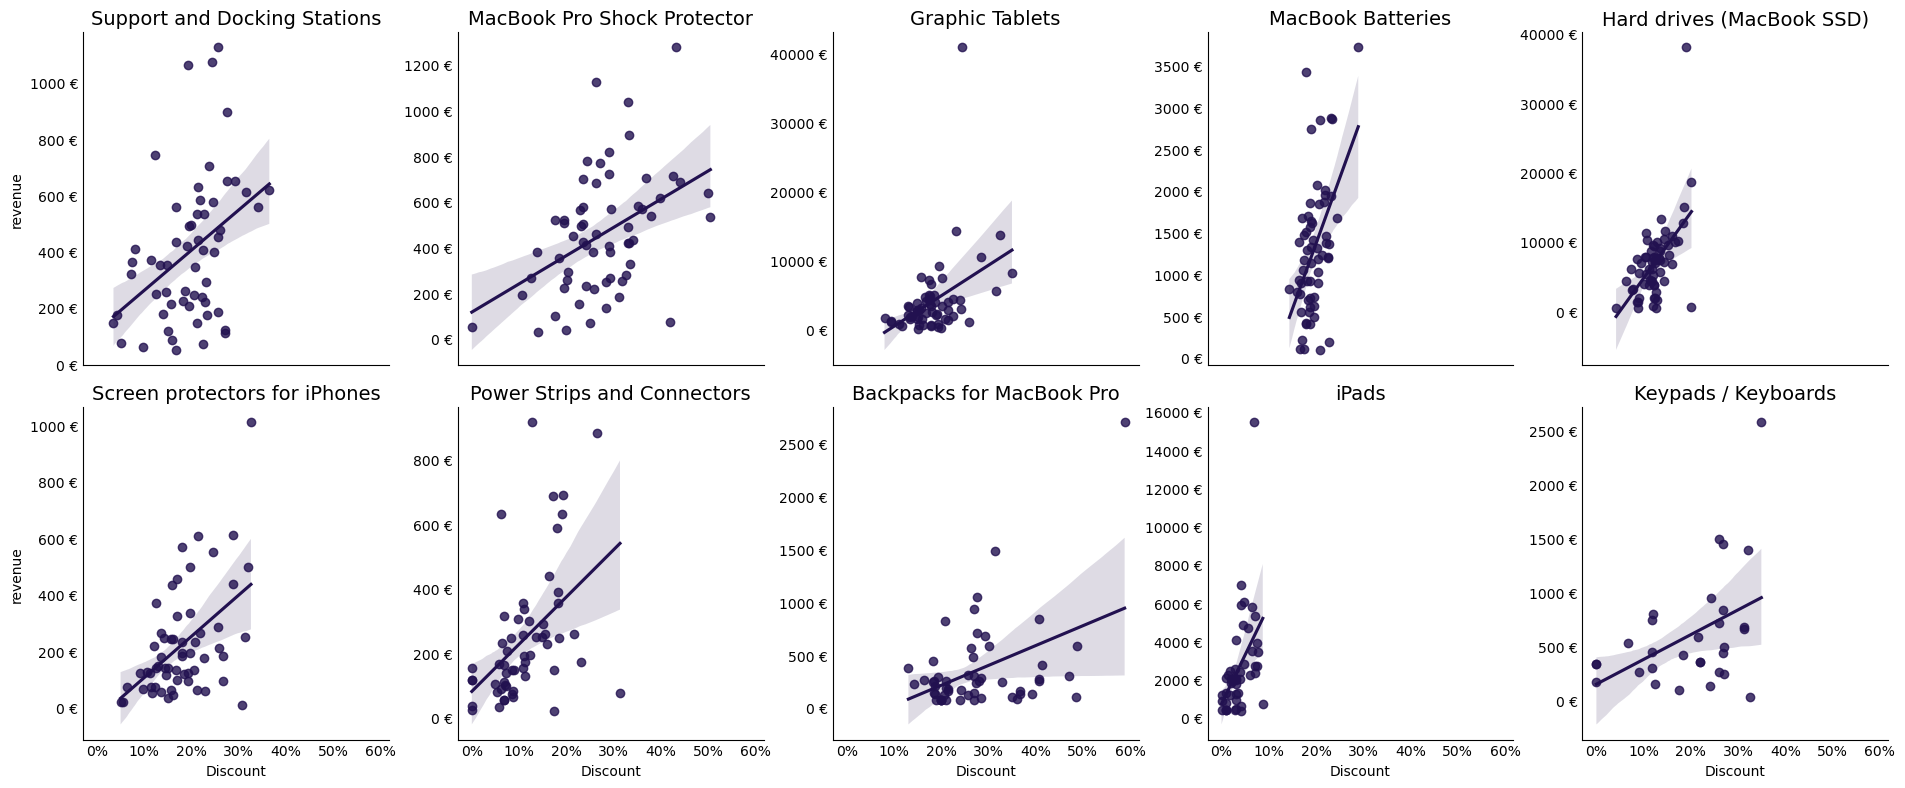

In [68]:
df = OL_type[OL_type['type_var'].isin(OL_regression.nlargest(10,'r2_revenue')['type'])]

df = (
    df
    .groupby(['type_var', df['created_date'].dt.to_period(period)])
    .agg({'price_rat':'mean','product_quantity':'sum','unit_price_total':'sum'})
    .rename(columns={'unit_price_total':'revenue','product_quantity':'quantity'})
    .reset_index()
)

df = df.merge(type_to_keywords_m,on='type_var',how='left')

df['price_rat'] *= 100

sns.set_palette("magma")
lm = sns.lmplot(
    data=df,
    x='price_rat',
    y='revenue',
    col='desc_m',
    palette='magma',
    col_wrap = 5,
    height = 4,
    aspect = 0.95,
    facet_kws=dict(sharey=False)
)

lm.set_titles("{col_name}",size=14)

for ax in lm.axes.flat:
    ax.set_xlabel('Discount')
    # ax.grid(color=[0.92,0.92,0.92])
    ax.set_axisbelow(True) # Plot grid etc. behind plot elements
    # Format xaxis to display percentage
    ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    ax.yaxis.set_major_formatter('{x:1.0f} €')
    ax.tick_params(axis='both', which='both', length=0)